MASOURIS ATHANASIOS <br>
03115189 NTUA ECE

<h2> 2<sup>nd</sup> Lab Exercise: Social structure analysis in artificial and real complex topologies</h2>

In this exercise we are going to analyze artificial and real complex topologies using the metrics from Lab 1 and some additional metrics, in order to study the social structure of those networks. In addition, we are going to use and compare three different algorithms for community detection both in the artificial and the real complex networks.


In [0]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering
import warnings

In [0]:
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = 15 , 15
plt.rcParams['figure.facecolor'] = 'white'
UNDERLINE = '\033[4m'
END = '\033[0m'

warnings.simplefilter("ignore")

# Part A: Studying real complex topologies

In this section we are going to study and understand the topological structure of the real networks and the increased complexity in the analysis of those networks. More specifically, for the topologies of **table1**, calculate and plot:
- The degree of each node and the average node degree of the graph
- The clustering coefficient of each node and the average clustering coefficient of the graph
- The ego-betweenness centrality of each node and the average ego-betweenness centrality of the graph

Compare the results on the real networks with the results on the artificial complex networks. Find which artificial model from Lab 1 best simulates each of the real networks.

**Note** We have to check if the graphs are directed. If they are, we have to transform them into undirected graphs with at least the same number of edges, before we apply the community detection algorithms. 

Table <b>1</b>: Real topologies found on <a style=text-decoration:none href="http://www-personal.umich.edu/~mejn/netdata/">http://www-personal.umich.edu/~mejn/netdata/</a> 

<table style=width:100%>
<tr>
    <th style=text-align:left>Topology</th>
    <th style=text-align:left>File</th>
    <th style=text-align:left>Description</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>
<tr>
    <td style=text-align:left>Les Miserables</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/lesmis.zip'>lesmis.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>lesmis.gml</b> contains the weighted network of coappearances of
characters in Victor Hugo's novel "Les Miserables".  Nodes represent characters as indicated by the labels and edges connect any pair of characters that appear in the same chapter of the book.  The values on the edges are the number of such coappearances.  The data on coappearances were taken from D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993)</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Dolphin social network</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/dolphins.zip'>dolphins.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>dolphins.gml</b> contains an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003)</p>
    </td>
</tr> 
</table>

## Creating artificial  topologies


In [0]:
n=190
d=4
M=750
R=0.15
p=0.3
k=4

REG = nx.watts_strogatz_graph(n,d,0)
RGER = nx.gnm_random_graph(n, M)

#we need to ensure connectivity for spectral clustering to work
RGG = nx.random_geometric_graph(n, R)
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n, R)
    
SF = nx.barabasi_albert_graph(n, d)
SW = nx.watts_strogatz_graph(n,k,p)

## Importing and visualizing the real topologies


In [0]:
football = nx.read_gml('football.gml')

In [0]:
print(nx.is_directed(football))

False


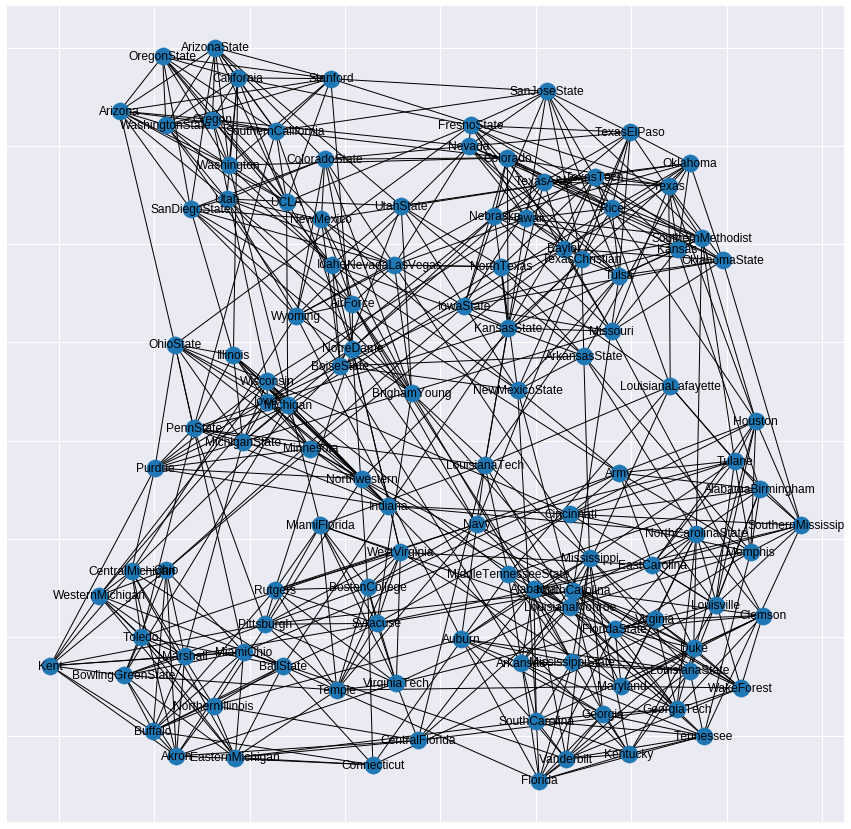

In [0]:
pos = nx.draw_networkx(football)

In [0]:
lesmis = nx.read_gml('lesmis.gml')

In [0]:
print(nx.is_directed(lesmis))

False


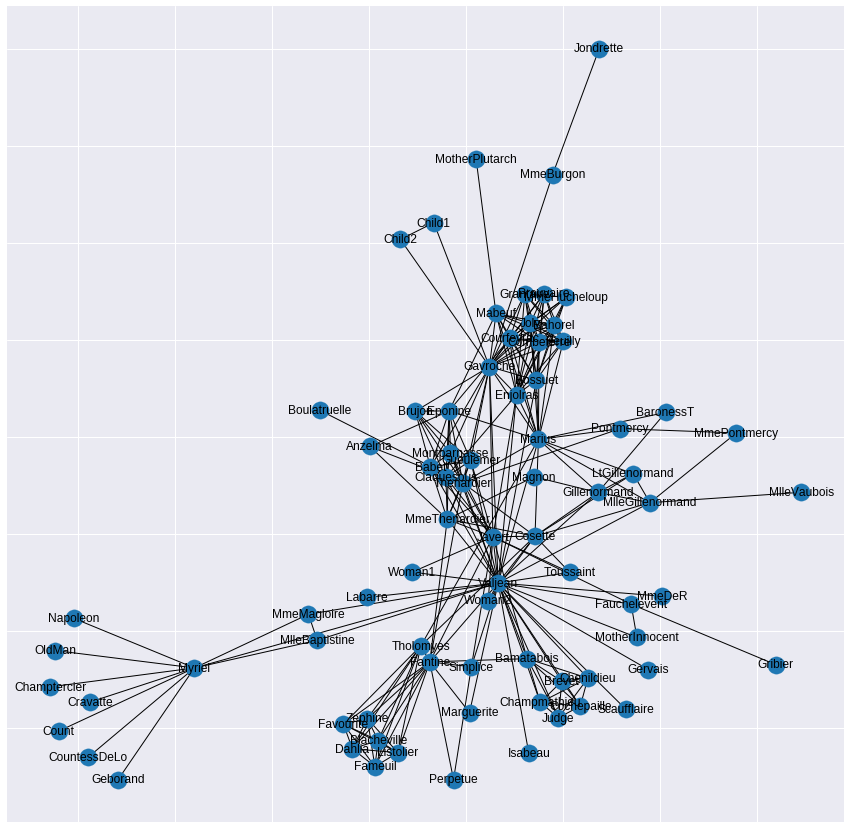

In [0]:
nx.draw_networkx(lesmis)

In [0]:
dolphins = nx.read_gml('dolphins.gml')

In [0]:
print(nx.is_directed(dolphins))

False


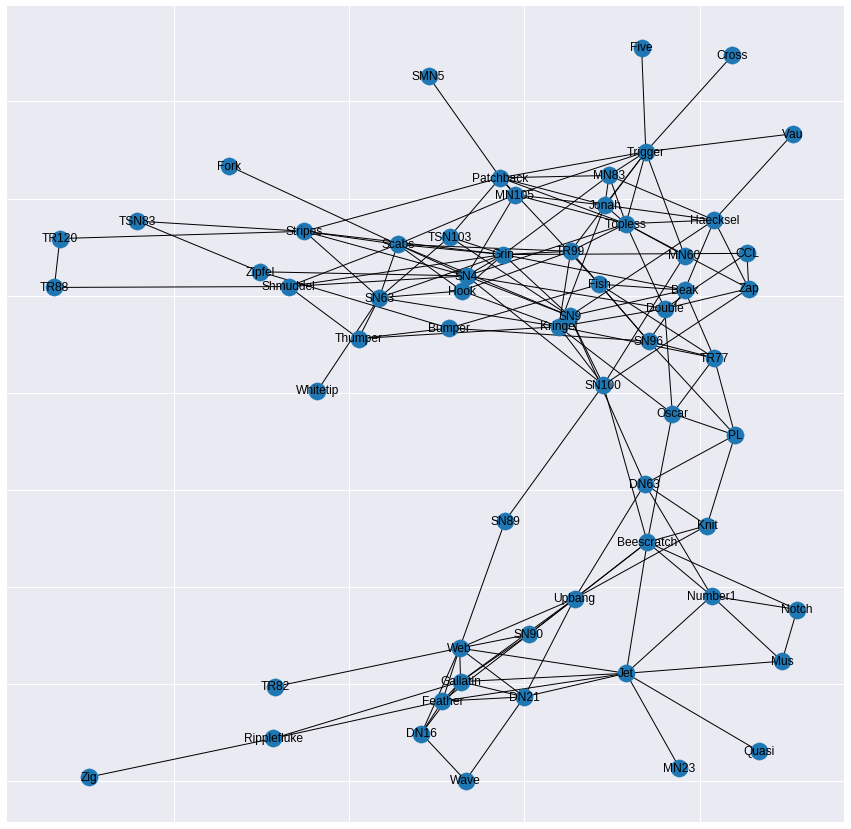

In [0]:
nx.draw_networkx(dolphins)

In [0]:
#convert nodes' labels from strings to integers in real topologies
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

nfootball,football_map=conv2int(football,0)
nlesmis, lesmis_map=conv2int(lesmis,0)
ndolphins, dolphins_map=conv2int(dolphins,0)

## Calculating node degree


In [0]:
def find_degree(G):
   return dict(G.degree())

degree = {
  'REG':find_degree(REG),
  'RGER':find_degree(RGER),
  'RGG':find_degree(RGG),
  'SF':find_degree(SF),
  'SW':find_degree(SW),
  'football':find_degree(nfootball),
  'lesmis':find_degree(nlesmis),
  'dolphins':find_degree(ndolphins)
}

def degree_hist(G_degree):
  return plt.hist(list(G_degree.values()),sorted(set(G_degree.values())), rwidth=0.5, align="left")

mean_degree = {
  'REG':np.mean(list(degree['REG'].values())),
  'RGER':np.mean(list(degree['RGER'].values())),
  'RGG':np.mean(list(degree['RGG'].values())),
  'SF':np.mean(list(degree['SF'].values())),
  'SW':np.mean(list(degree['SW'].values())),
  'football':np.mean(list(degree['football'].values())),
  'lesmis':np.mean(list(degree['lesmis'].values())),
  'dolphins':np.mean(list(degree['dolphins'].values()))
}


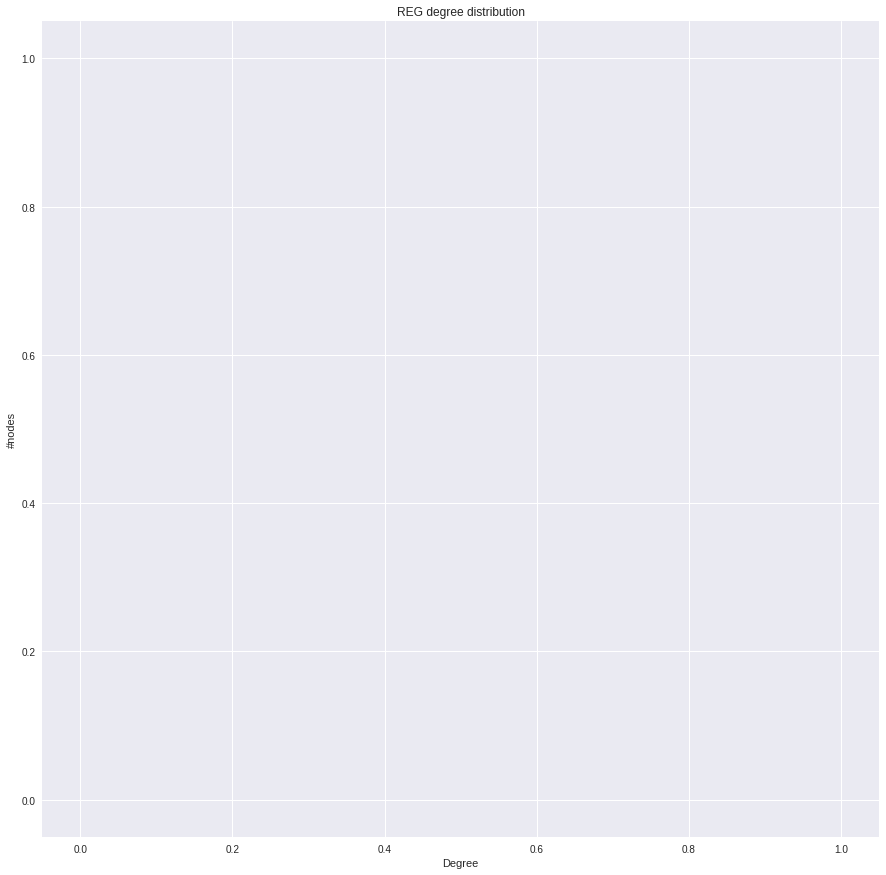

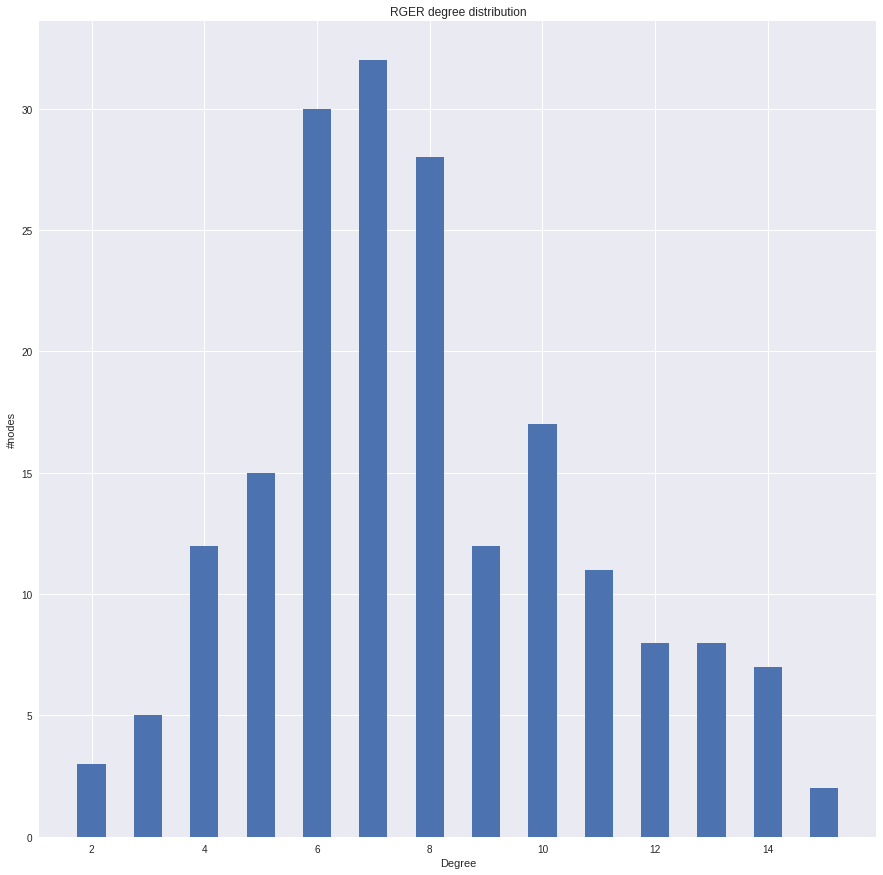

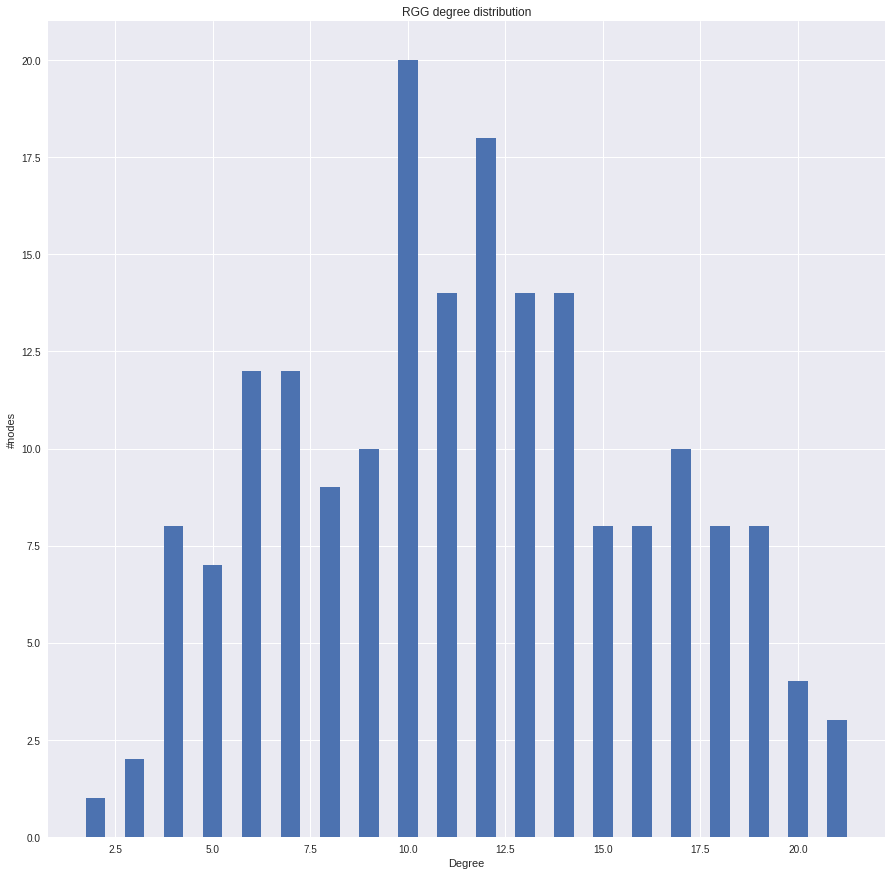

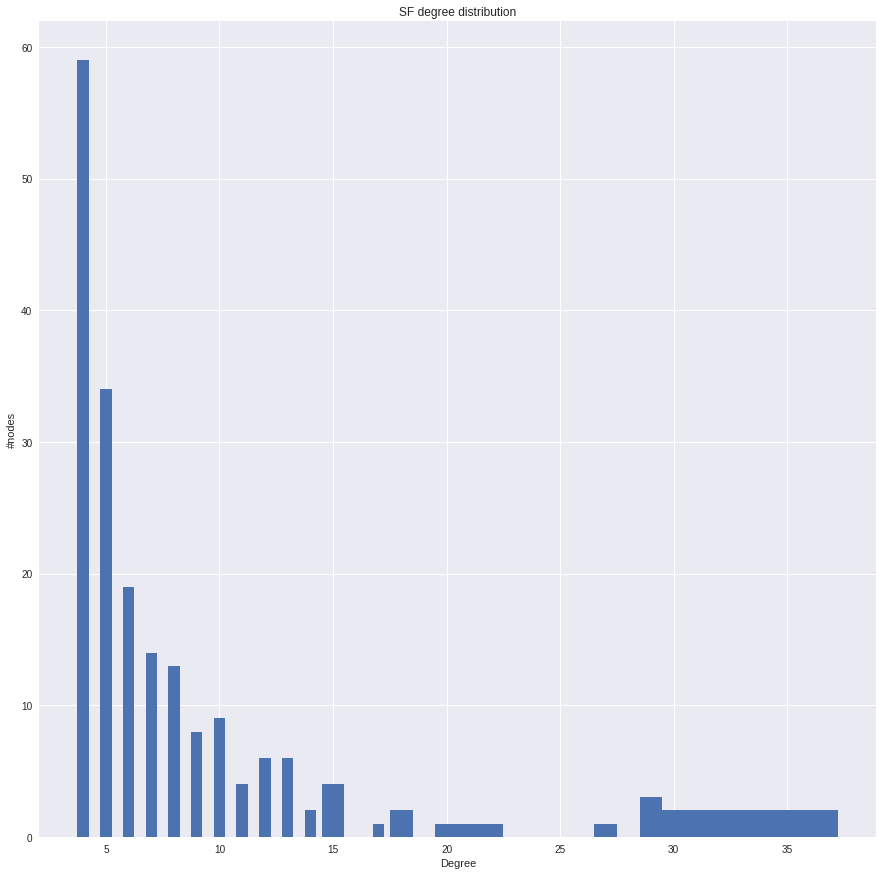

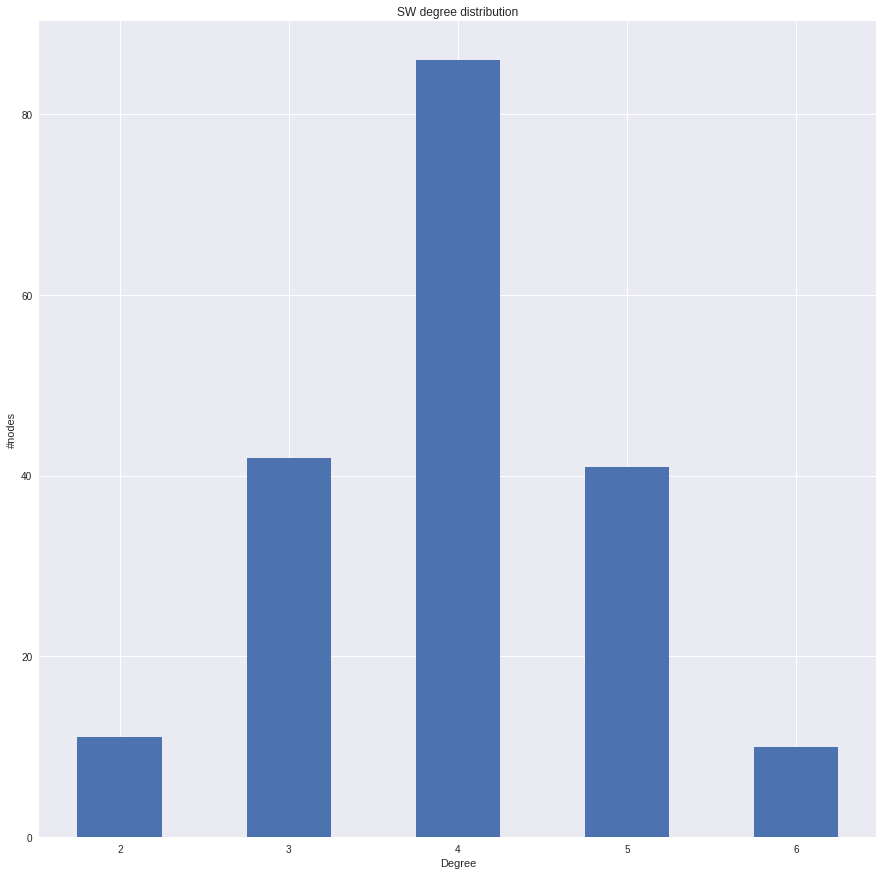

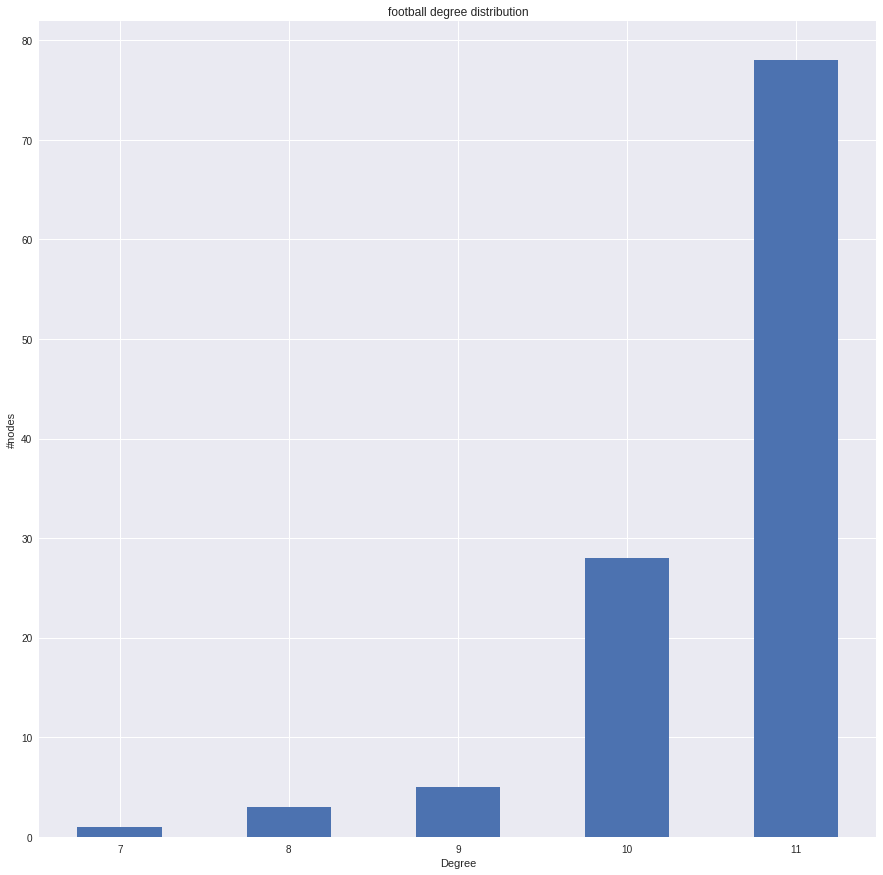

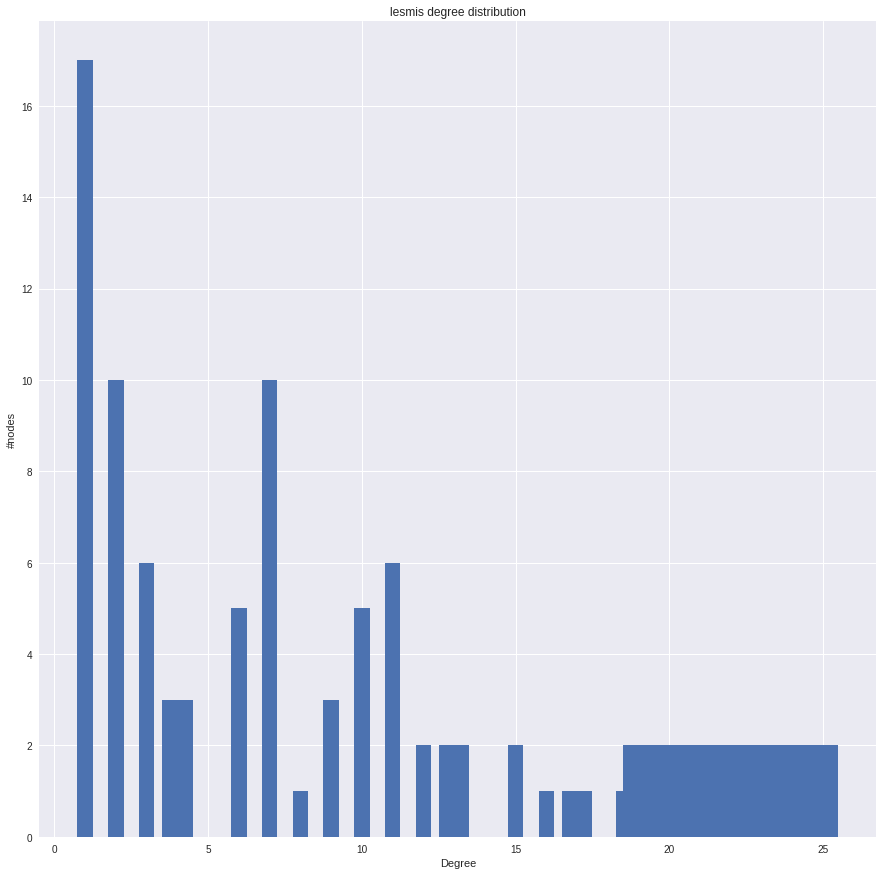

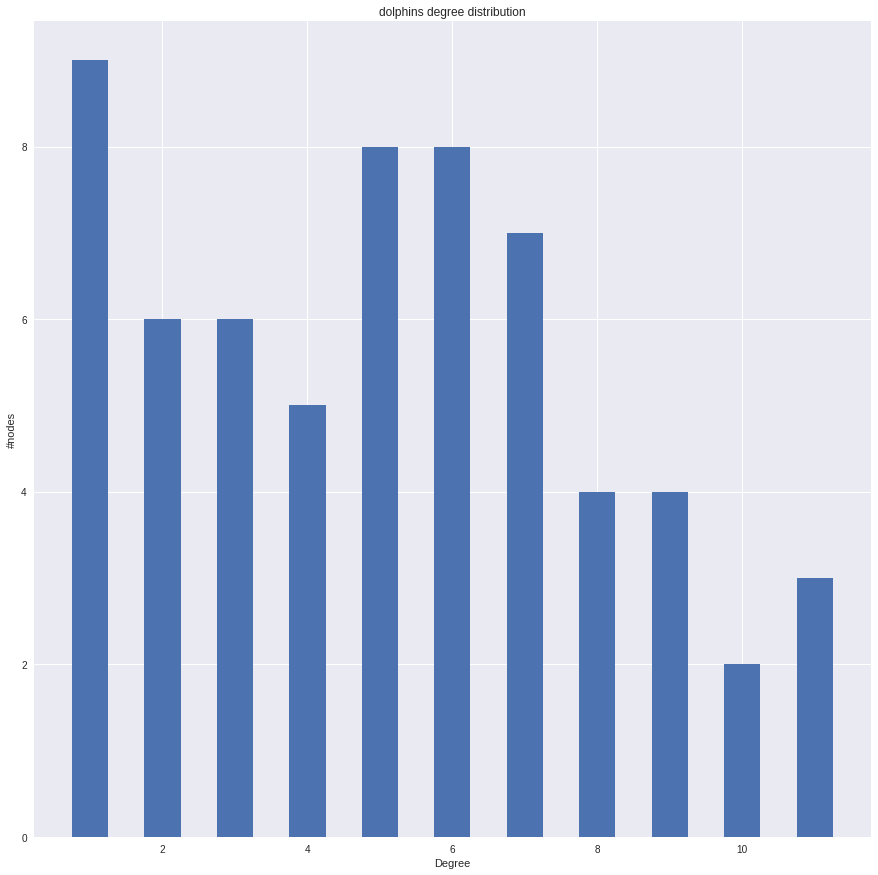

In [0]:
for key in degree.keys():
  plt.figure()
  plt.title(key+" degree distribution")
  plt.xlabel("Degree")
  plt.ylabel("#nodes")
  degree_hist(degree[key])

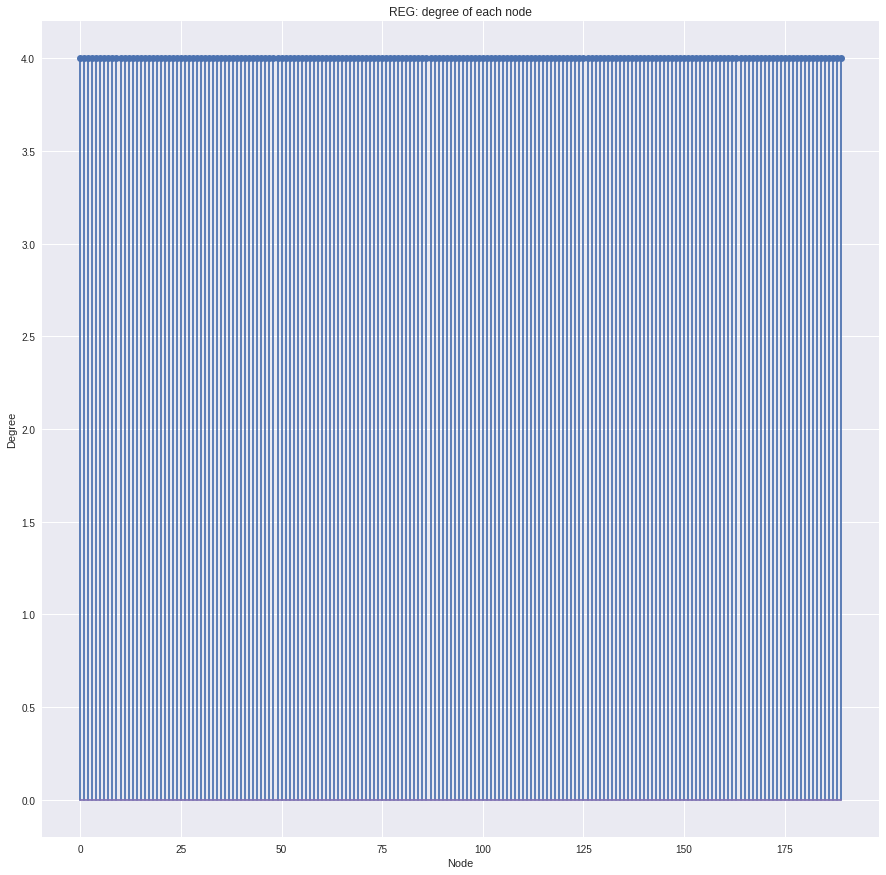

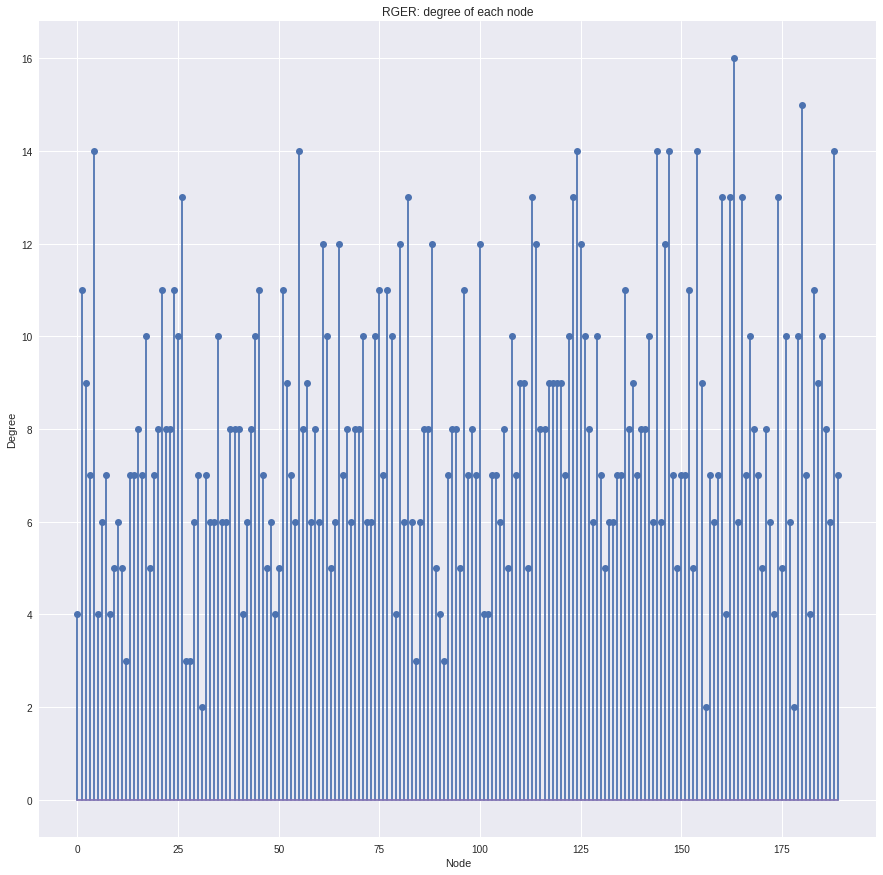

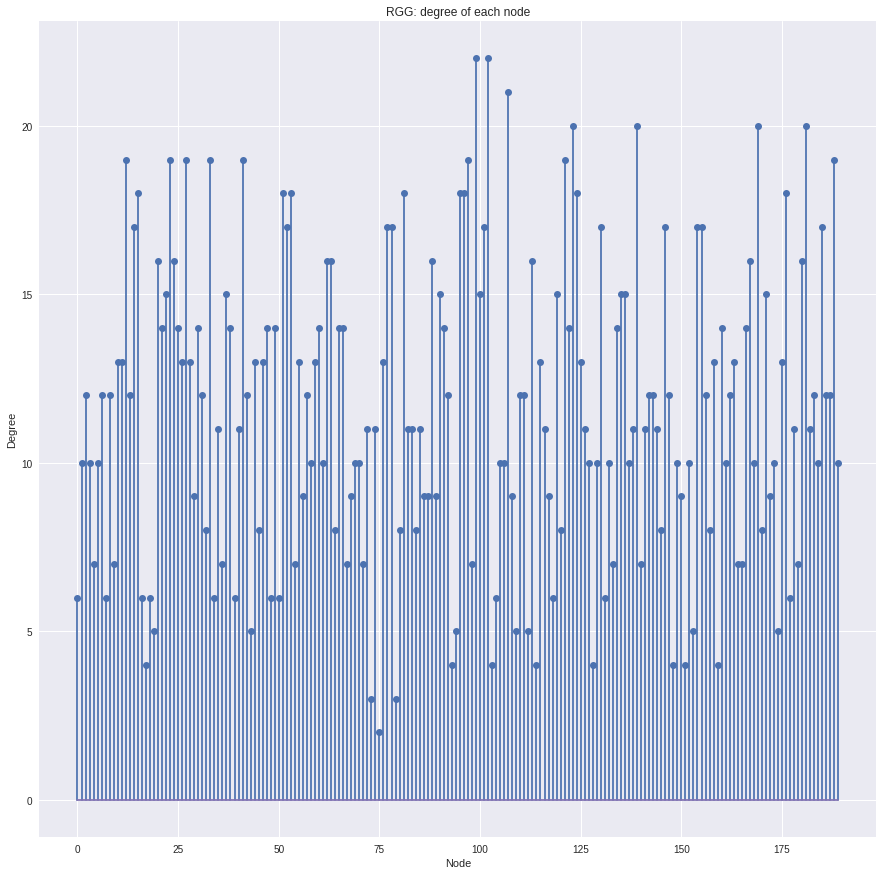

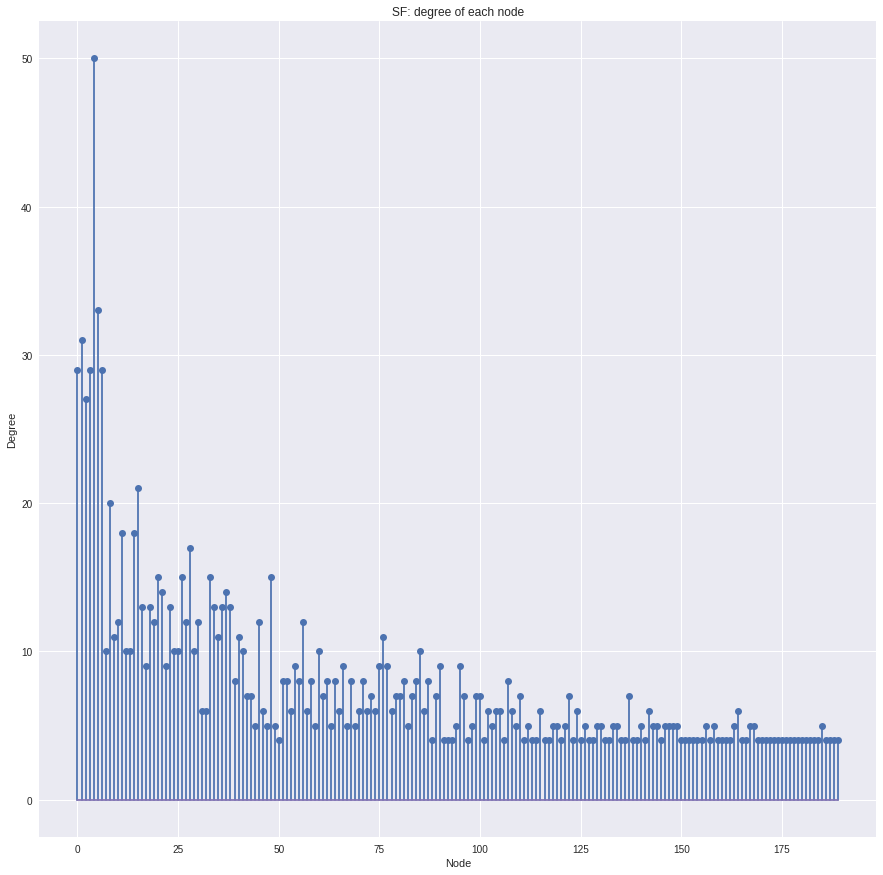

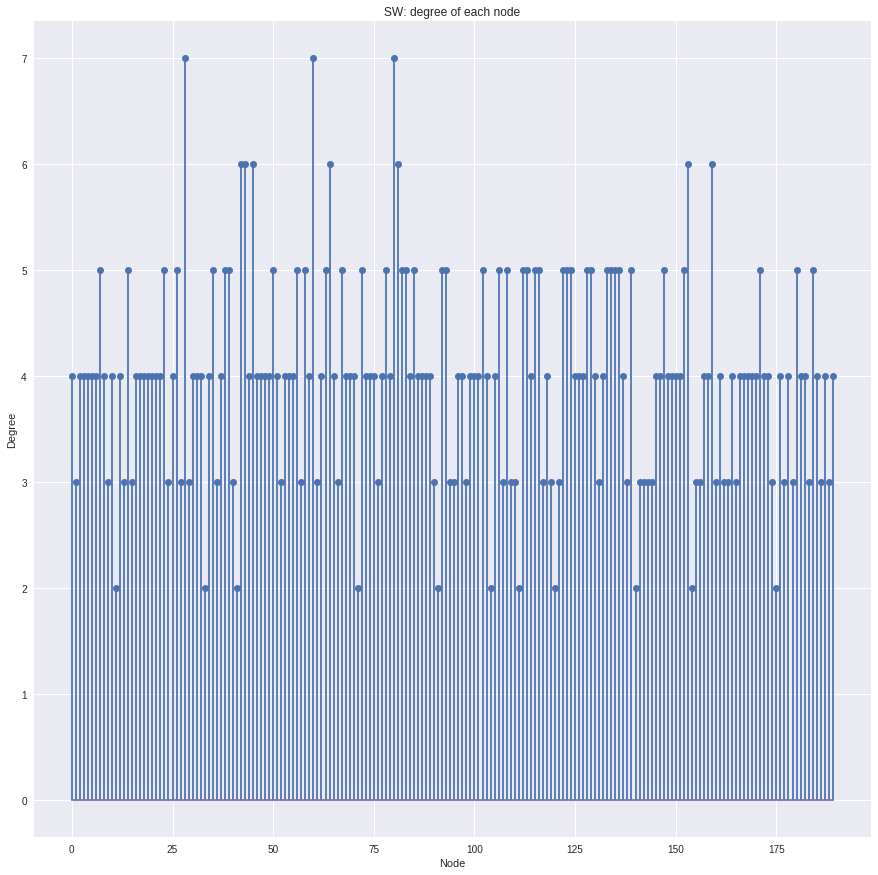

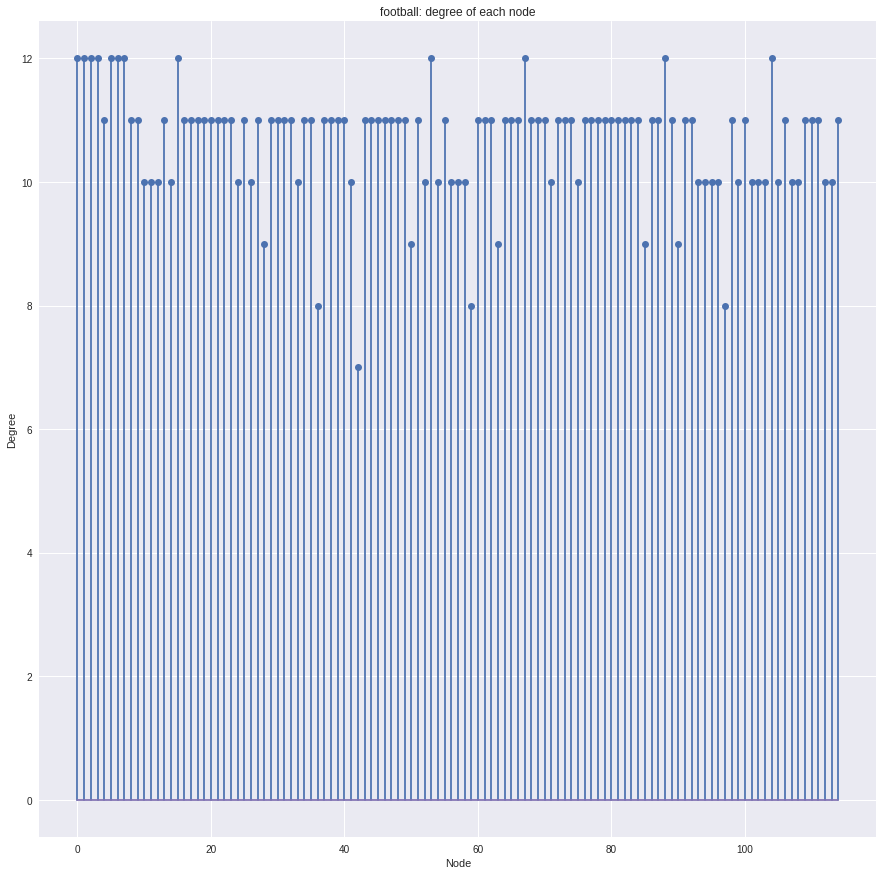

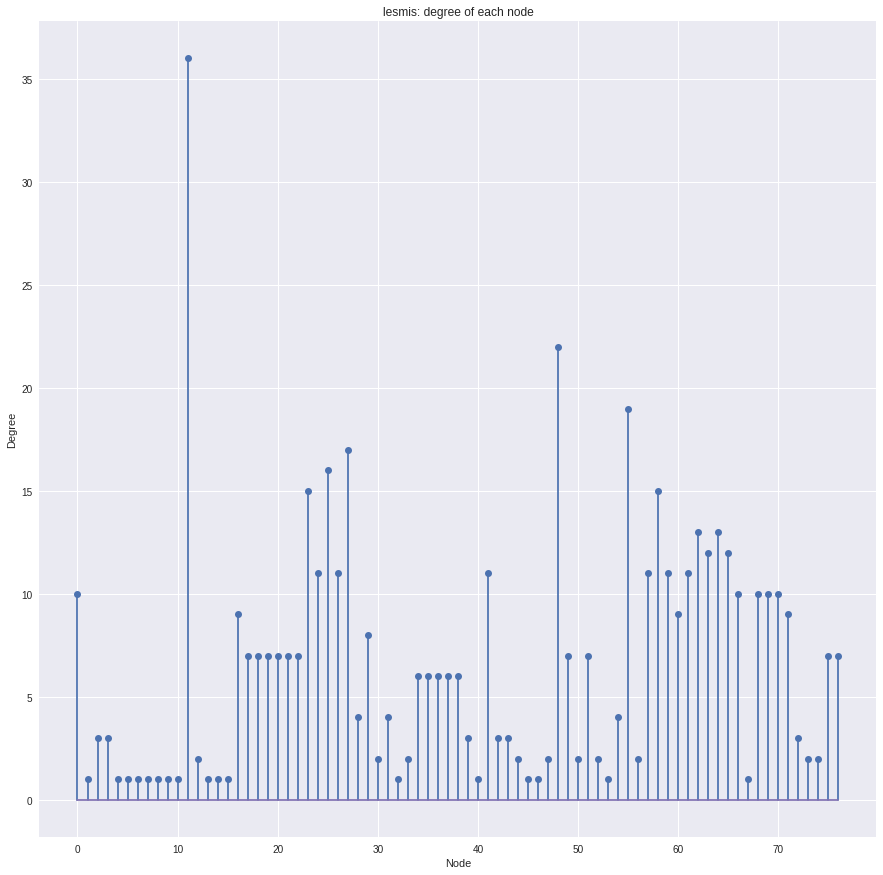

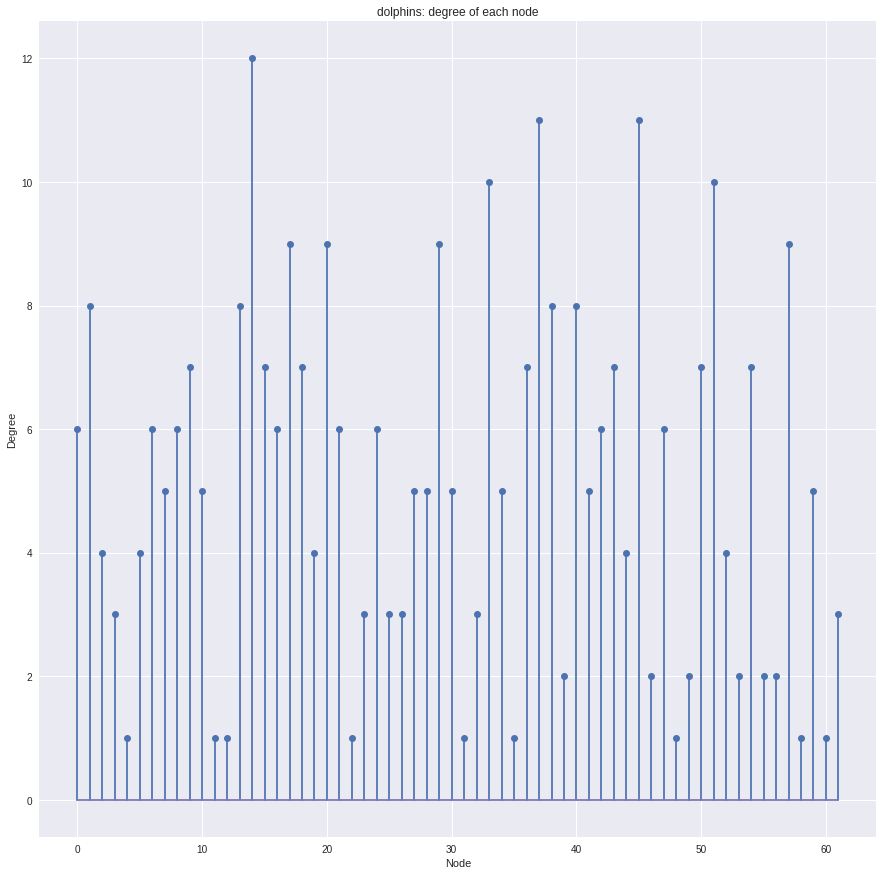

In [0]:
for key in degree.keys():
  plt.figure()
  plt.title(key+": degree of each node")
  plt.xlabel("Node")
  plt.ylabel("Degree")
  plt.stem(degree[key].keys(), degree[key].values())

In [0]:
for key in mean_degree.keys():
  print(UNDERLINE + key+ ' network:' + END)
  mean = mean_degree[key]
  print("The average degree is: %f" %mean)

REG network:
The average degree is: 4.000000
RGER network:
The average degree is: 7.894737
RGG network:
The average degree is: 11.578947
SF network:
The average degree is: 7.831579
SW network:
The average degree is: 4.000000
football network:
The average degree is: 10.660870
lesmis network:
The average degree is: 6.597403
dolphins network:
The average degree is: 5.129032


## Calculating clustering coefficient


In [0]:
def clust_coef(G):
  return nx.clustering(G)

cc = {
  'REG':clust_coef(REG),
  'RGER':clust_coef(RGER),
  'RGG':clust_coef(RGG),
  'SF':clust_coef(SF),
  'SW':clust_coef(SW),
  'football':clust_coef(nfootball),
  'lesmis':clust_coef(nlesmis),
  'dolphins':clust_coef(ndolphins)
}


def cc_hist(G_cc):
  return plt.hist(list(G_cc.values()),sorted(set(G_cc.values())), rwidth=0.5, align="left")

mean_cc = {
  'REG':np.mean(list(cc['REG'].values())),
  'RGER':np.mean(list(cc['RGER'].values())),
  'RGG':np.mean(list(cc['RGG'].values())),
  'SF':np.mean(list(cc['SF'].values())),
  'SW':np.mean(list(cc['SW'].values())),
  'football':np.mean(list(cc['football'].values())),
  'lesmis':np.mean(list(cc['lesmis'].values())),
  'dolphins':np.mean(list(cc['dolphins'].values()))
}

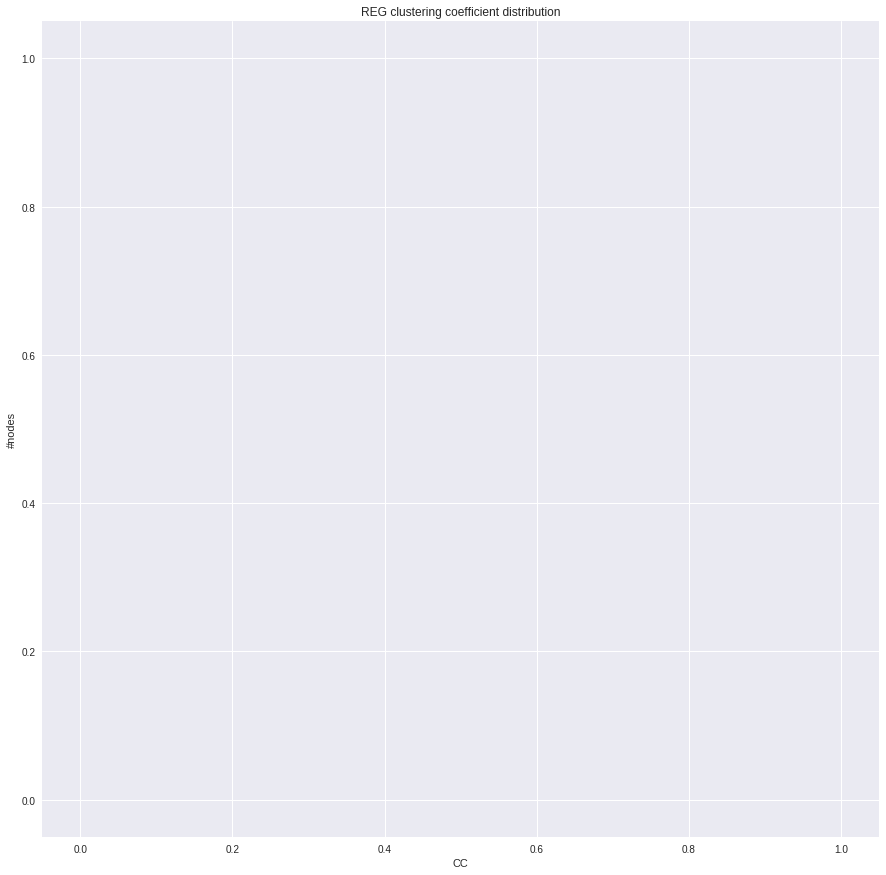

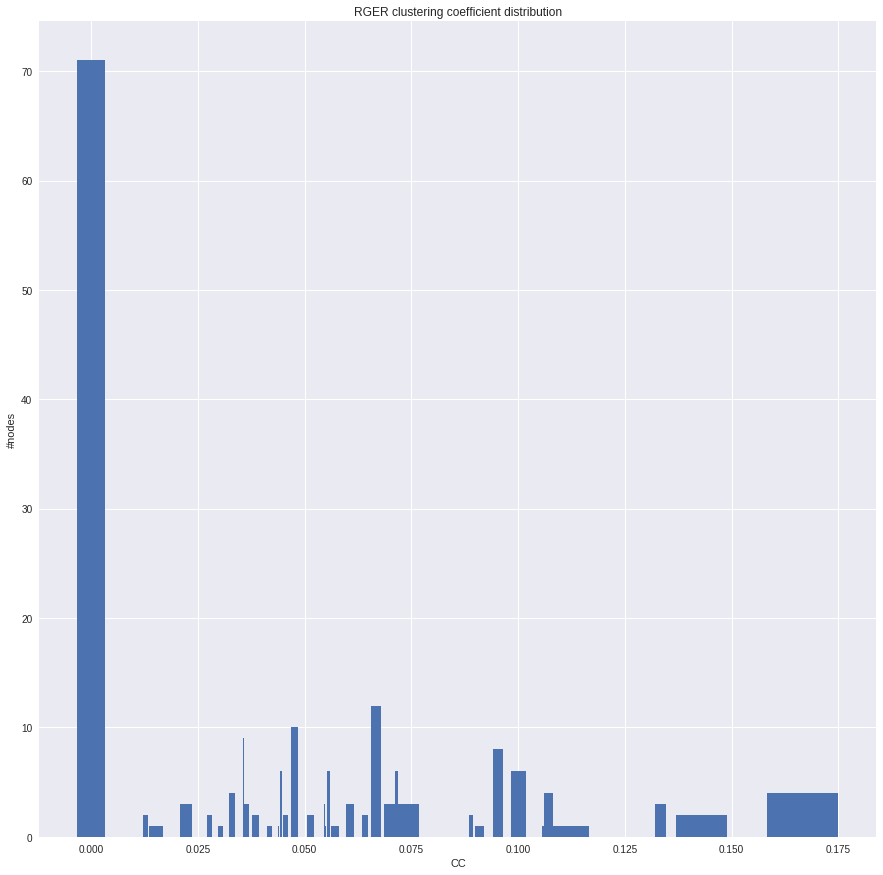

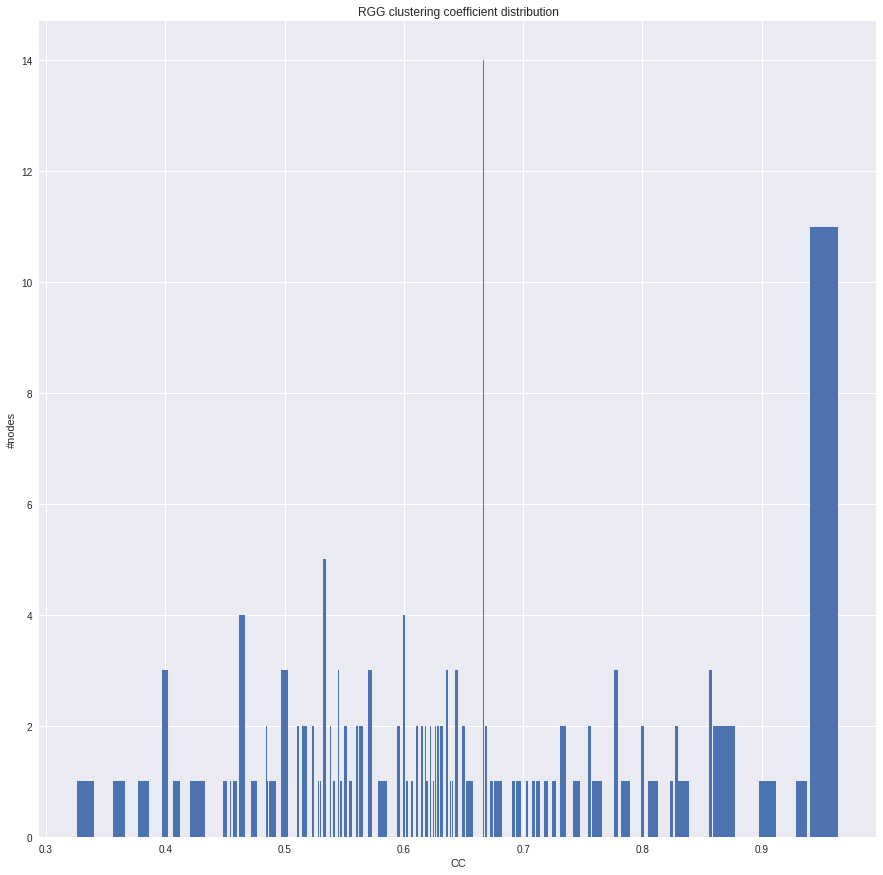

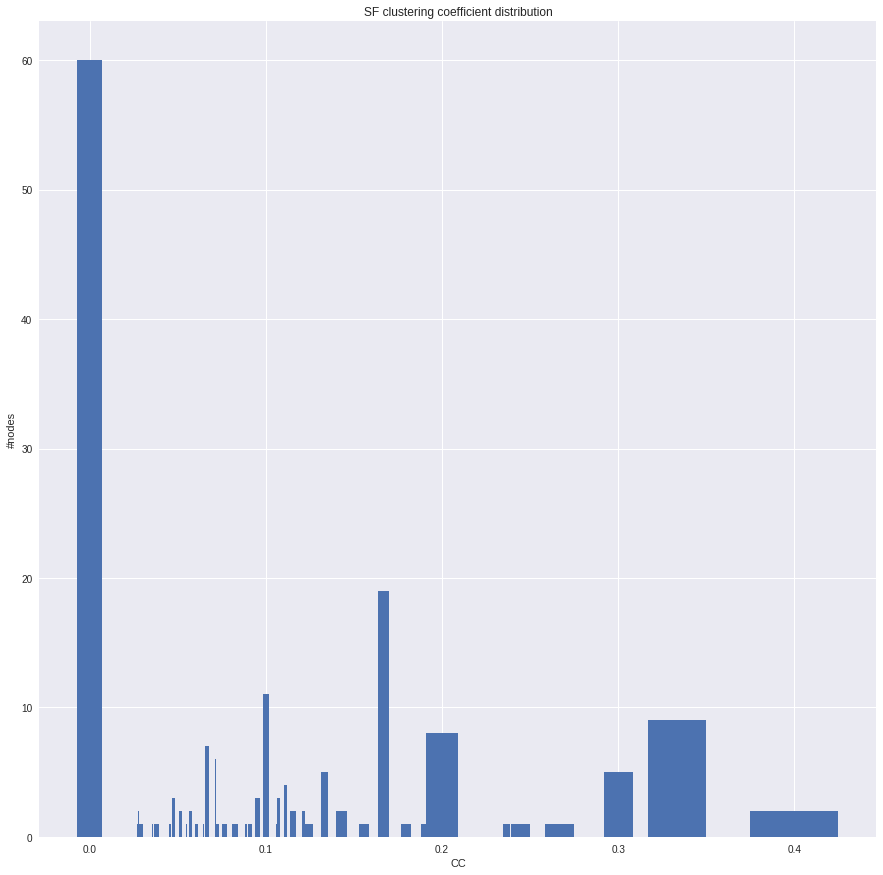

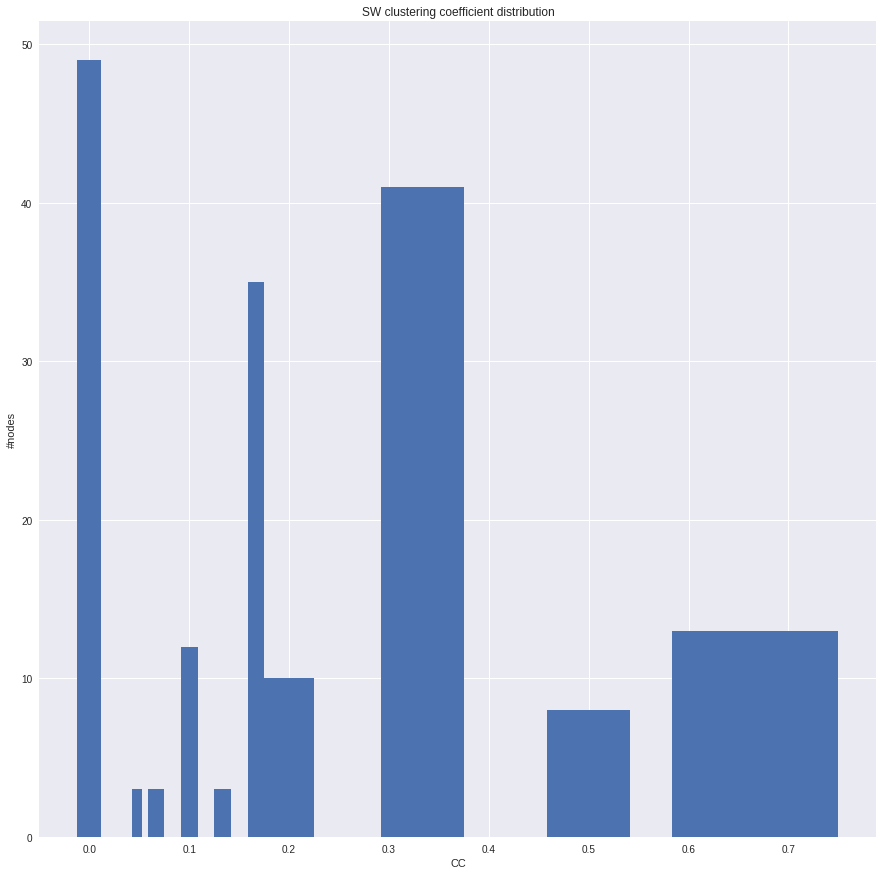

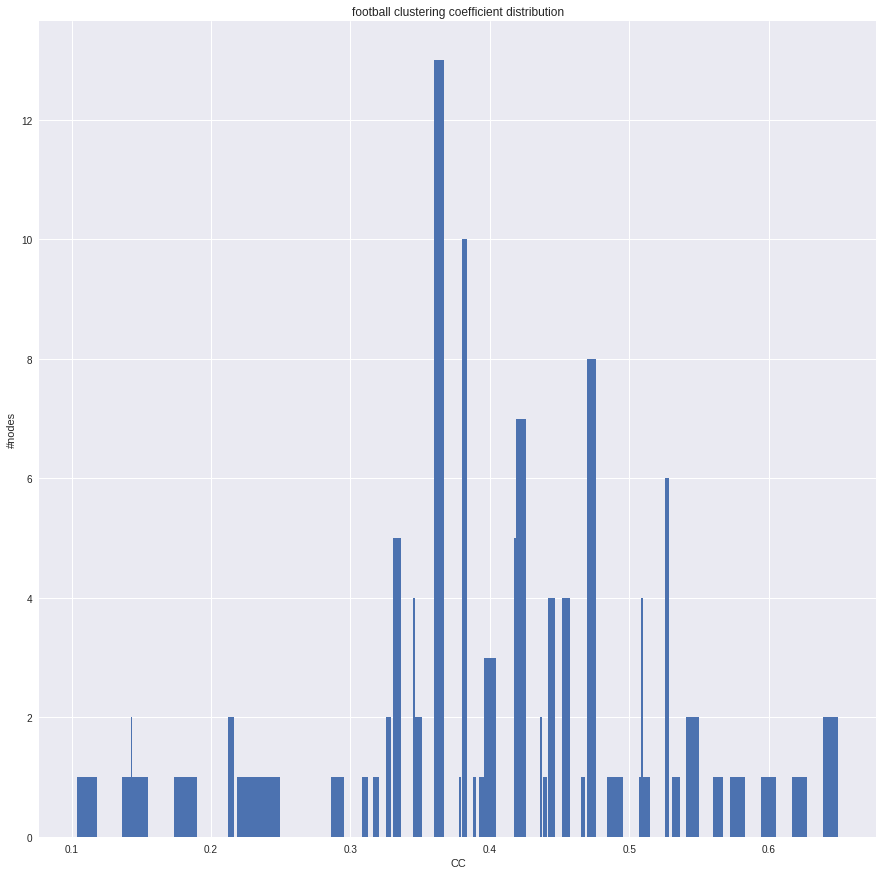

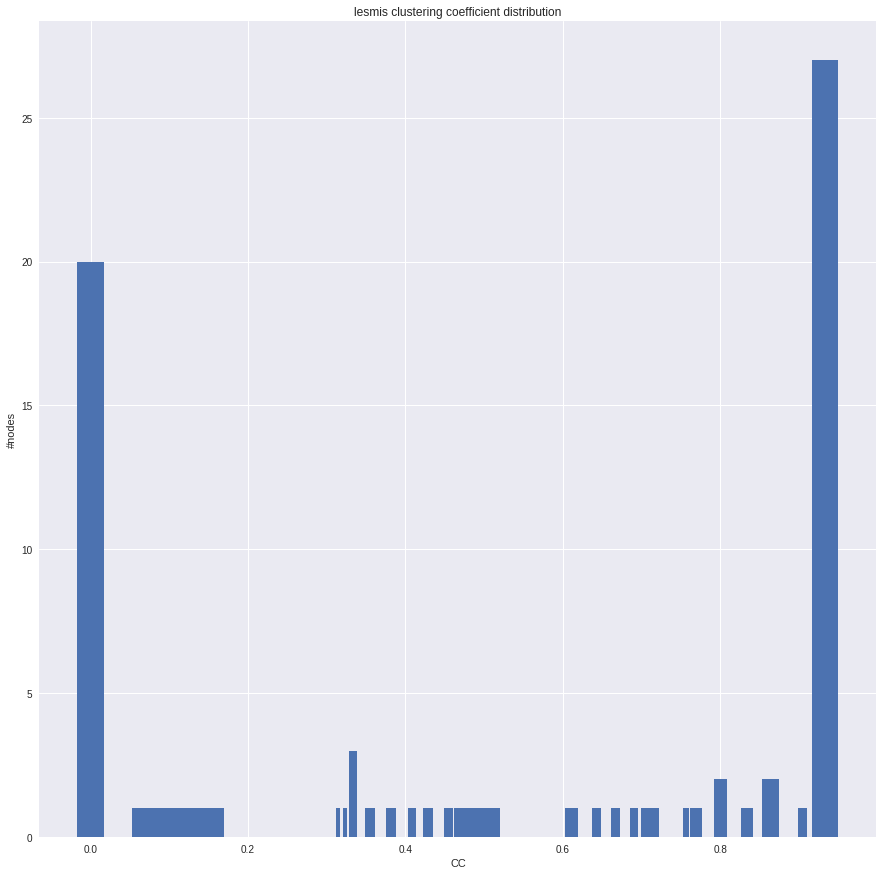

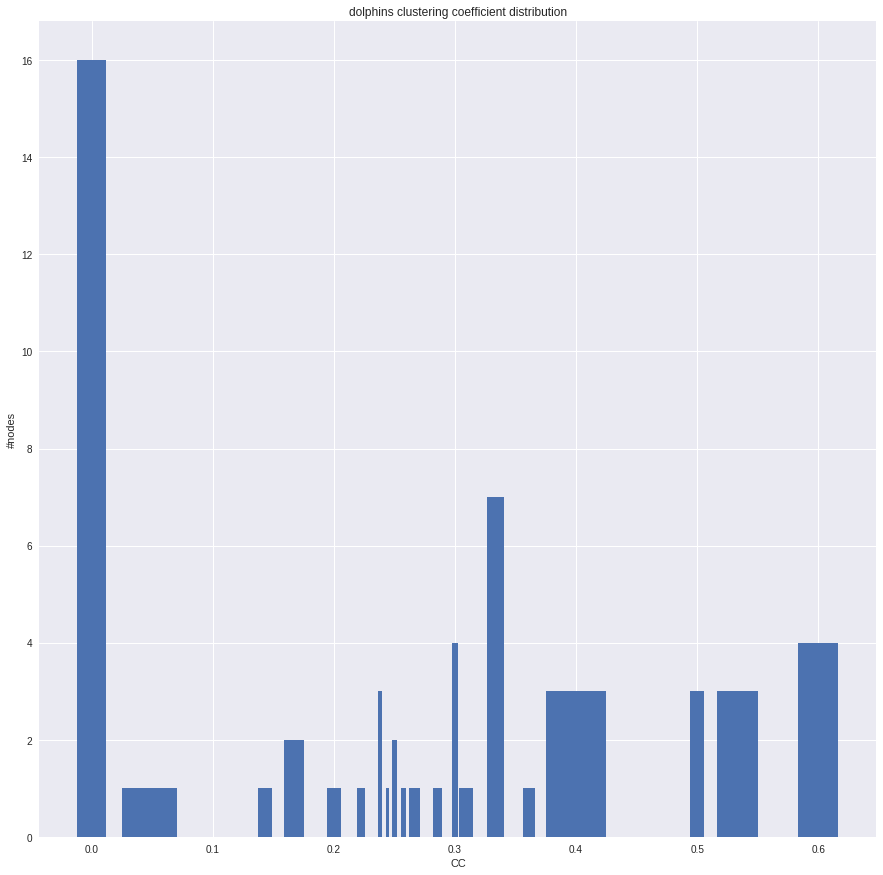

In [0]:
for key in cc.keys():
  plt.figure()
  plt.title(key+" clustering coefficient distribution")
  plt.xlabel("CC")
  plt.ylabel("#nodes")
  degree_hist(cc[key])

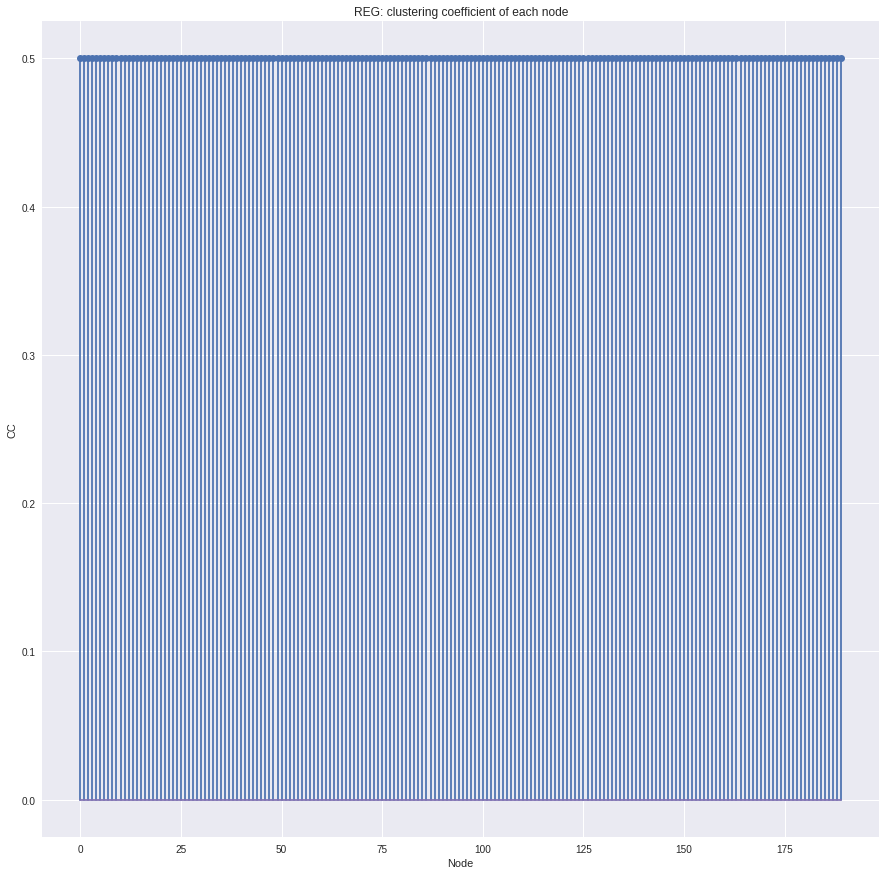

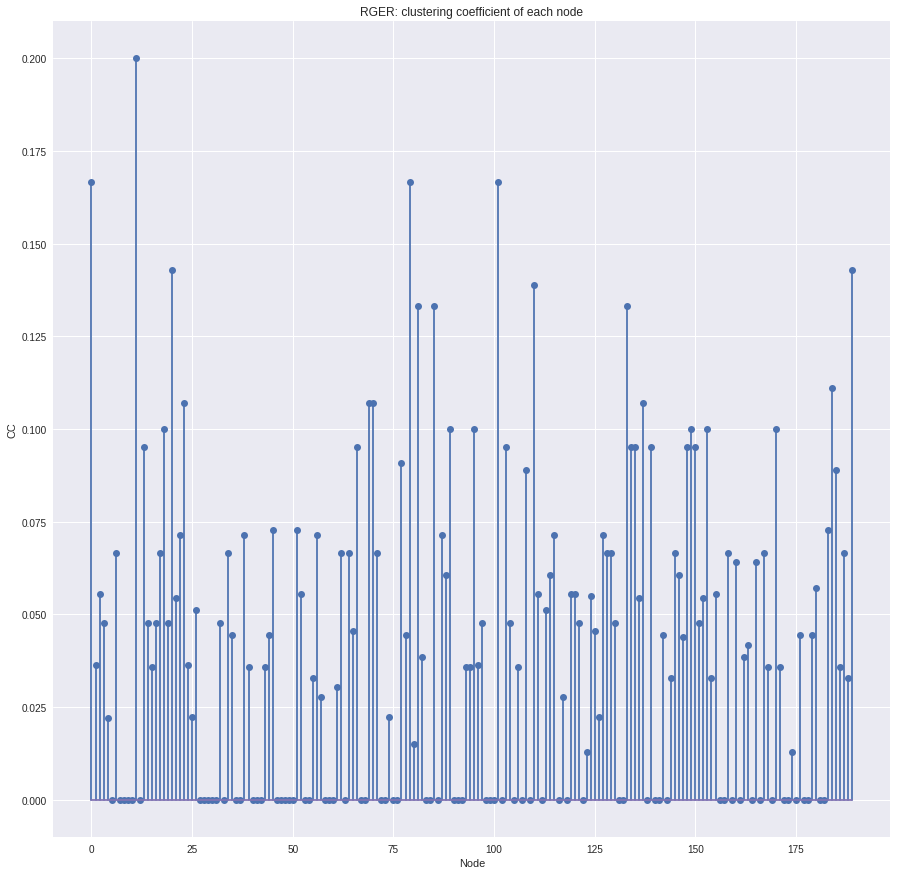

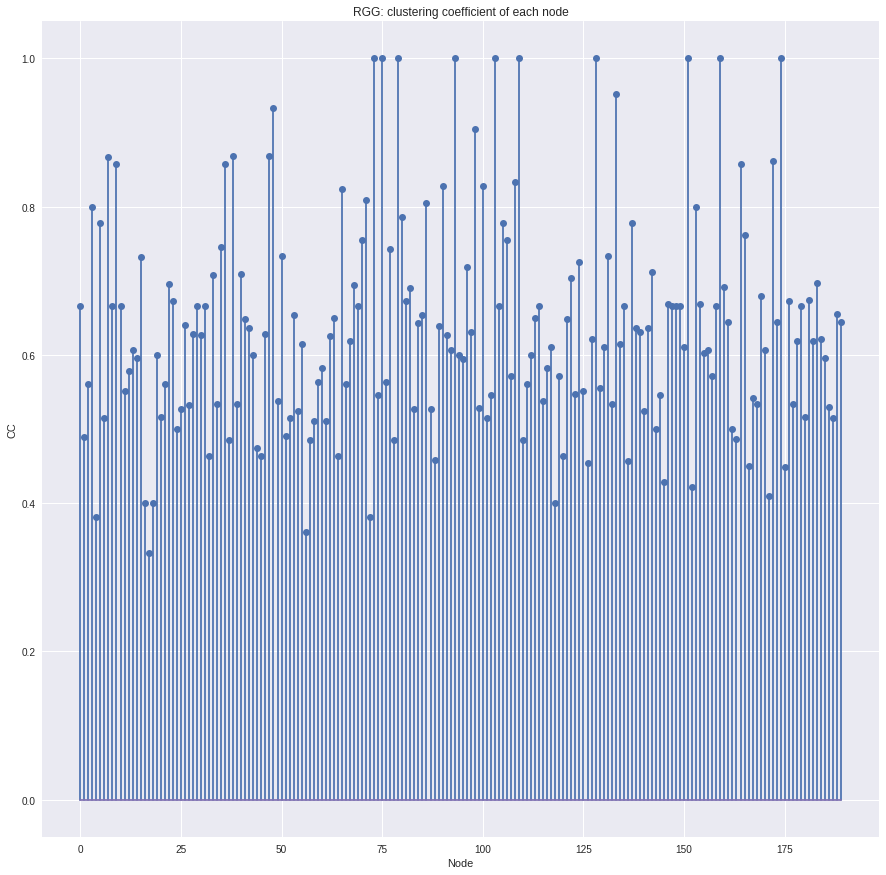

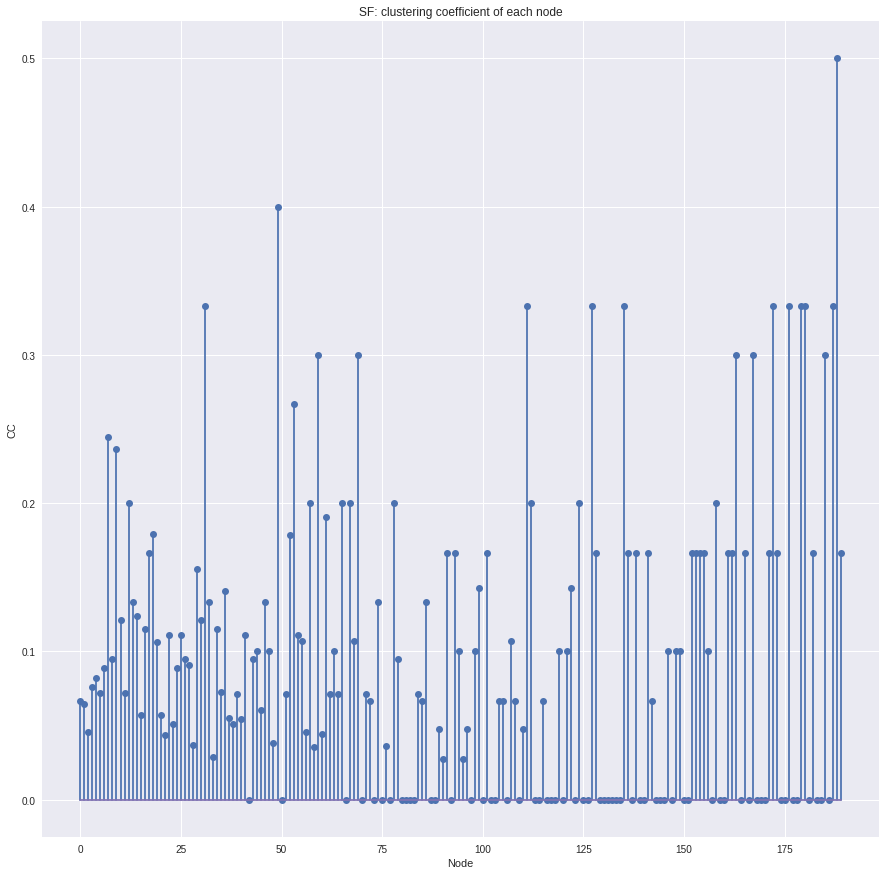

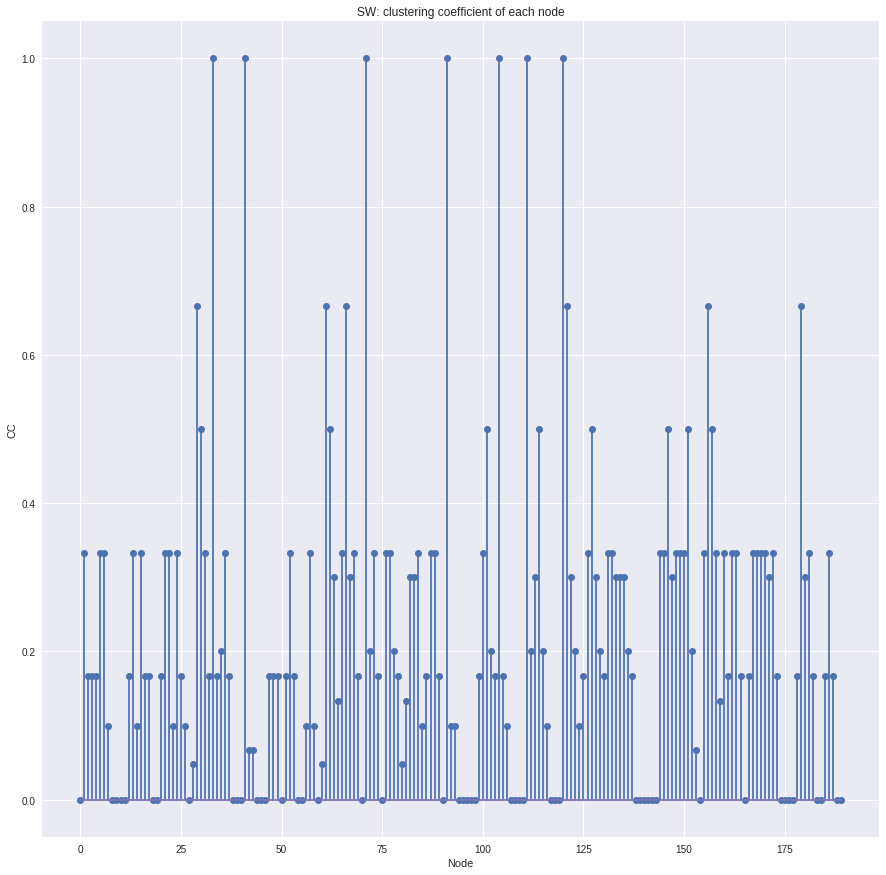

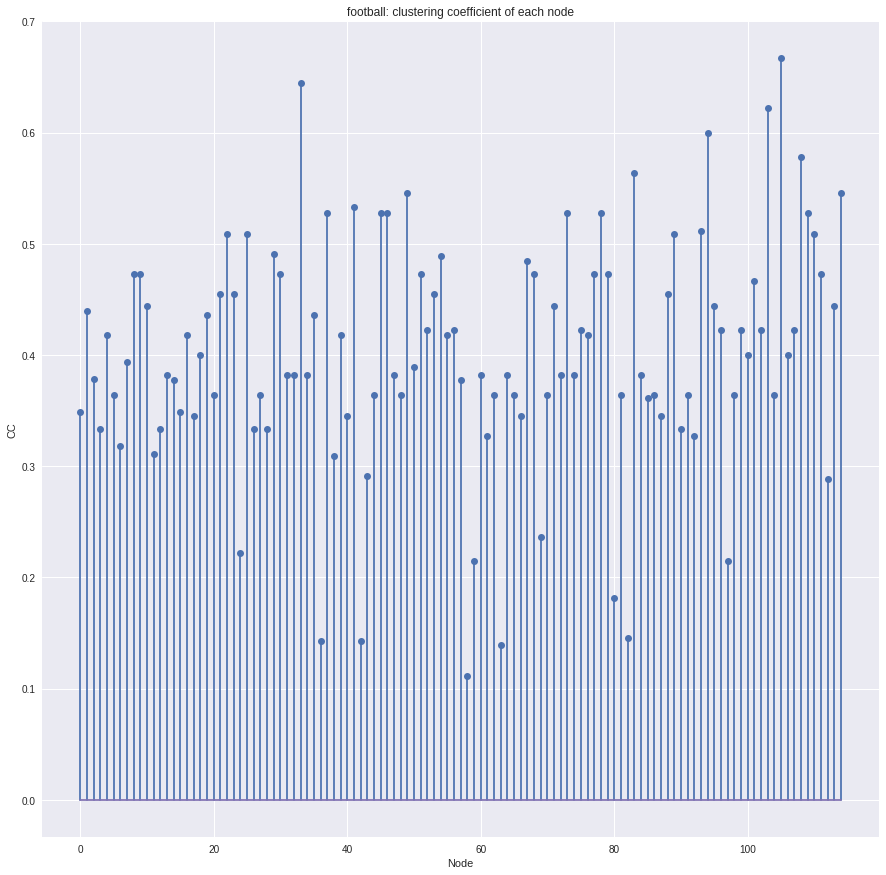

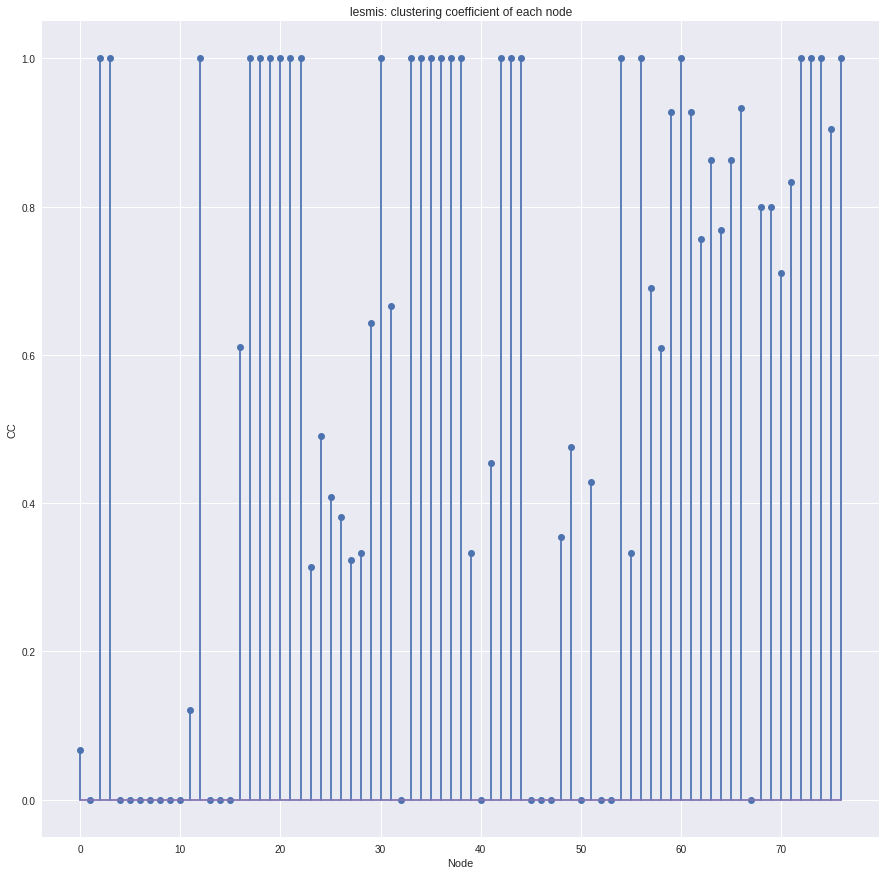

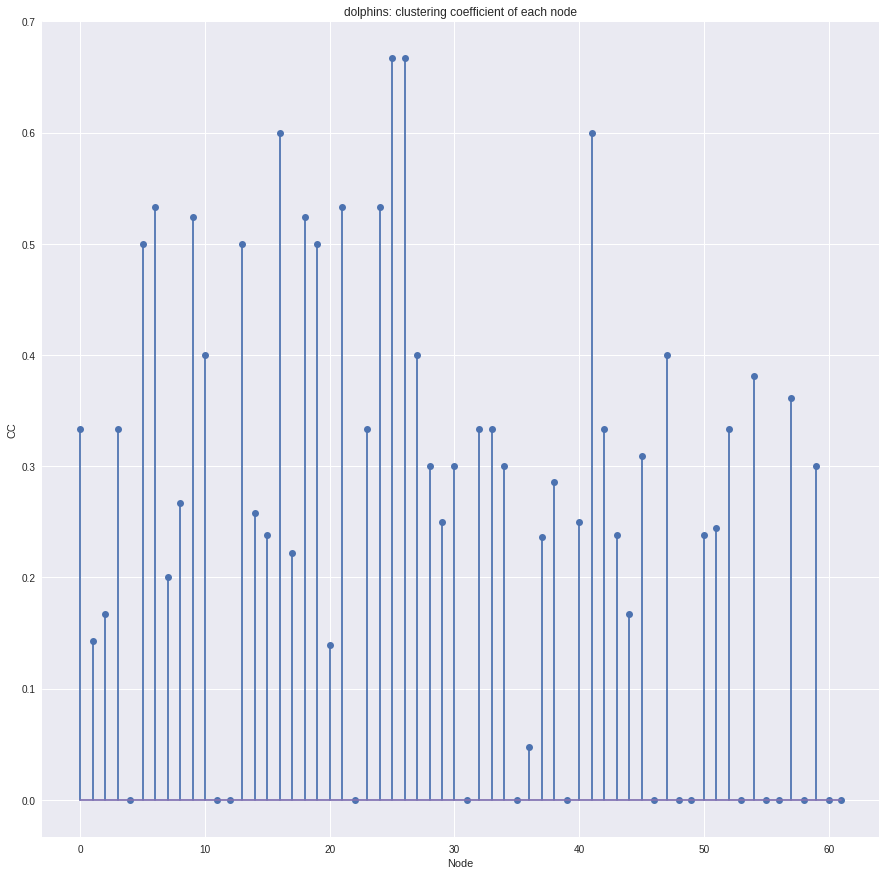

In [0]:
for key in cc.keys():
  plt.figure()
  plt.title(key+": clustering coefficient of each node")
  plt.xlabel("Node")
  plt.ylabel("CC")
  plt.stem(cc[key].keys(), cc[key].values())

In [0]:
for key in mean_cc.keys():
  print(UNDERLINE + key+ ' network:' + END)
  mean = mean_cc[key]
  print("The average clustering coefficient is: %f" %mean)

REG network:
The average clustering coefficient is: 0.500000
RGER network:
The average clustering coefficient is: 0.041775
RGG network:
The average clustering coefficient is: 0.637060
SF network:
The average clustering coefficient is: 0.096168
SW network:
The average clustering coefficient is: 0.222857
football network:
The average clustering coefficient is: 0.403216
lesmis network:
The average clustering coefficient is: 0.573137
dolphins network:
The average clustering coefficient is: 0.258958


## Calculating ego-betweenness centrality


In [0]:
def ego_centrality(G):
  ego_centr = dict()

  for i in range (0,len(G)):
    ego_net = nx.ego_graph(G,i)
    A = nx.adjacency_matrix(ego_net).todense()
    ones = np.ones(A.shape)
    A_sq = np.linalg.matrix_power(A,2)
    A_ego = np.multiply(A_sq, ones - A)
    A_ego = np.triu(A_ego,1)
    A_ego = A_ego[np.nonzero(A_ego)]
    A_ego = 1/A_ego
    ego_centr[i] = np.sum(A_ego)

  return ego_centr

ebtw = {
  'REG':ego_centrality(REG),
  'RGER':ego_centrality(RGER),
  'RGG':ego_centrality(RGG),
  'SF':ego_centrality(SF),
  'SW':ego_centrality(SW),
  'football':ego_centrality(nfootball),
  'lesmis':ego_centrality(nlesmis),
  'dolphins':ego_centrality(ndolphins)
}

def egobtw_hist(G_ebtw): 
  return plt.hist(list(G_ebtw.values()),sorted(set(G_ebtw.values())), rwidth=0.5, align="left")

mean_ebtw = {
  'REG':np.mean(list(ebtw['REG'].values())),
  'RGER':np.mean(list(ebtw['RGER'].values())),
  'RGG':np.mean(list(ebtw['RGG'].values())),
  'SF':np.mean(list(ebtw['SF'].values())),
  'SW':np.mean(list(ebtw['SW'].values())),
  'football':np.mean(list(ebtw['football'].values())),
  'lesmis':np.mean(list(ebtw['lesmis'].values())),
  'dolphins':np.mean(list(ebtw['dolphins'].values()))
}

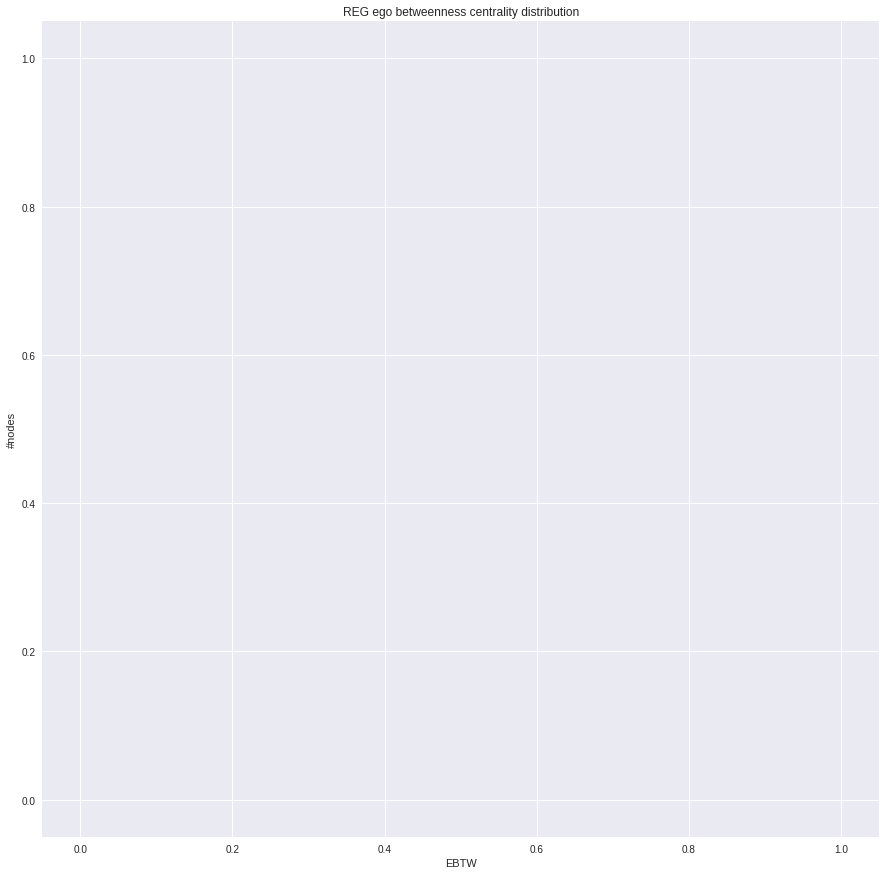

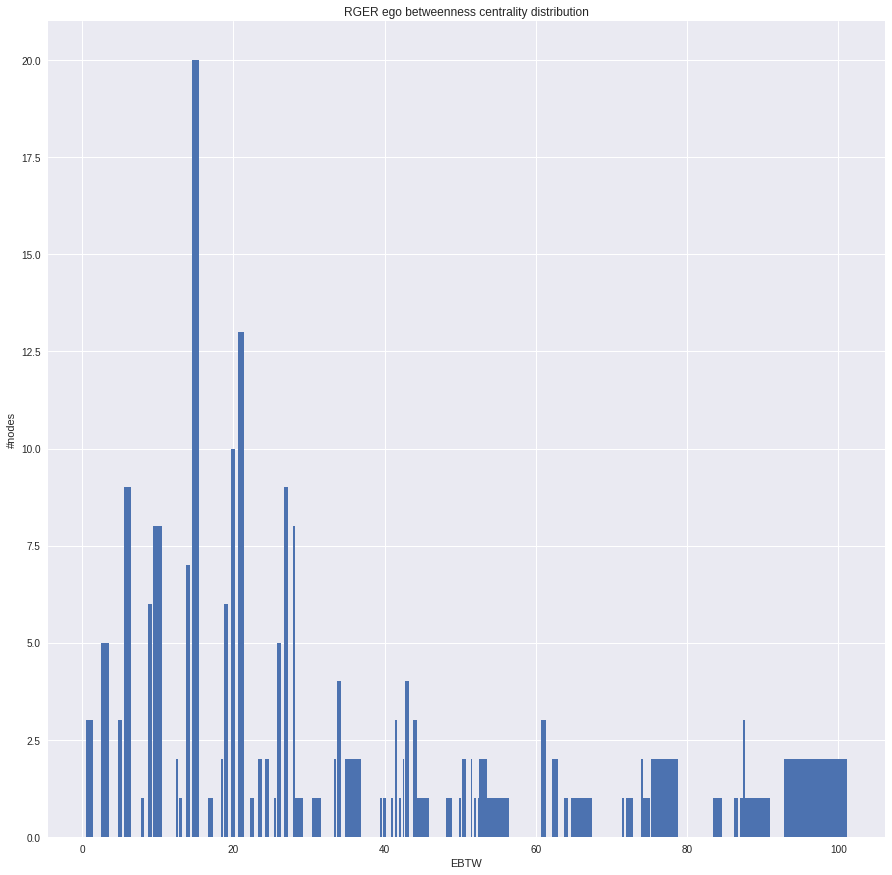

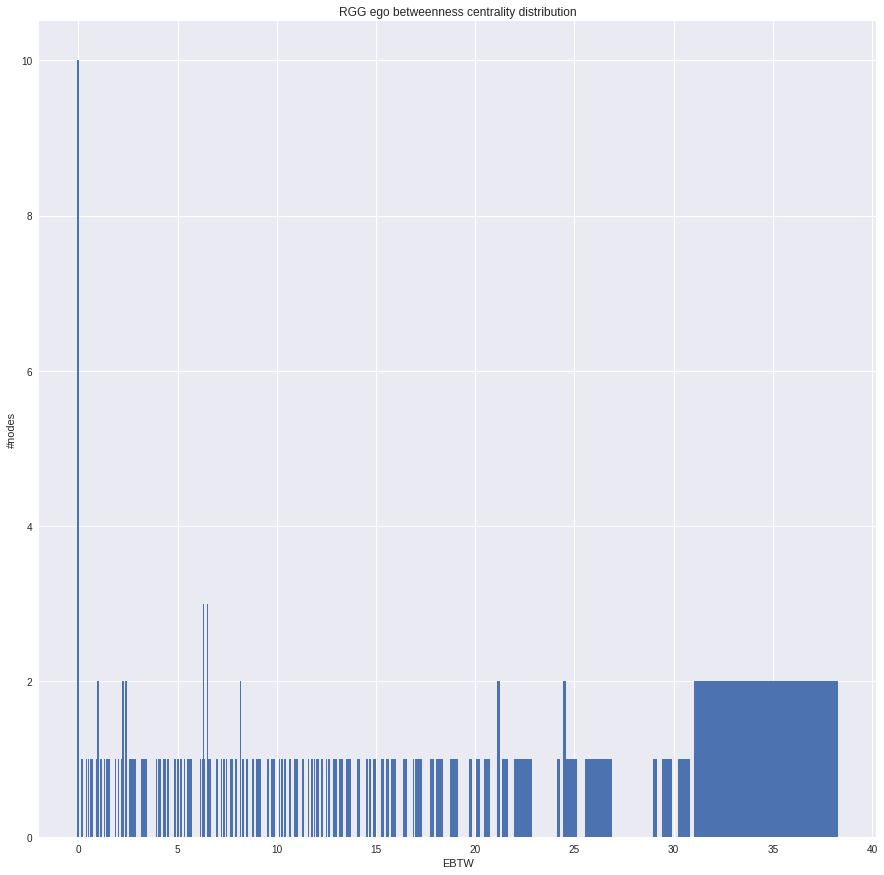

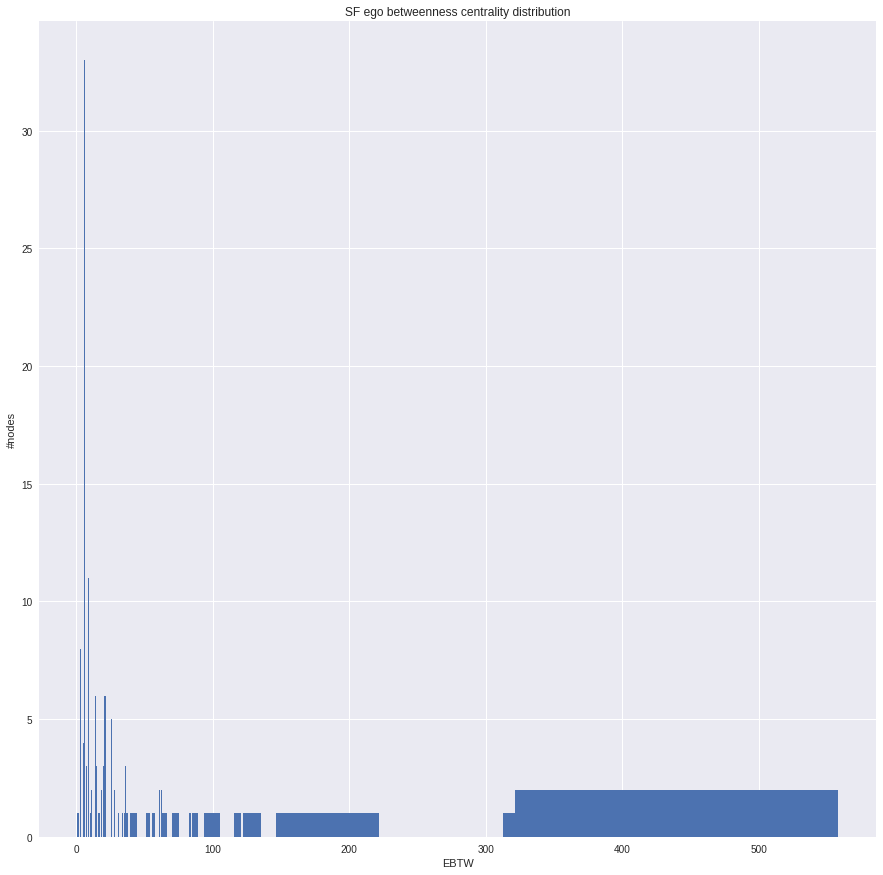

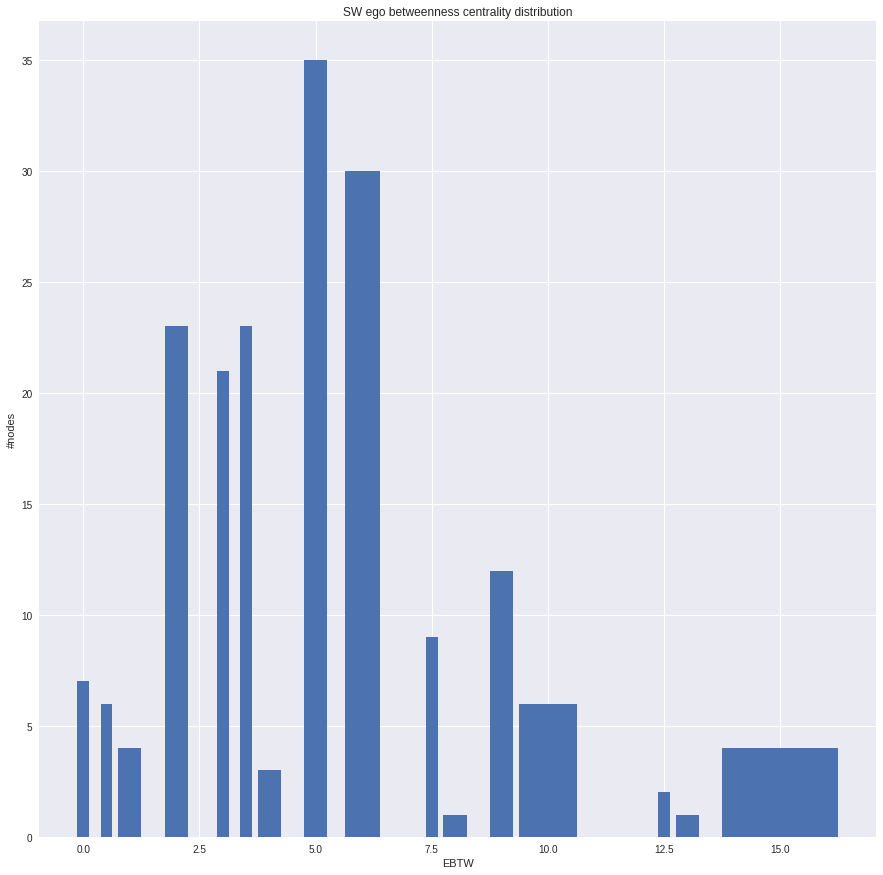

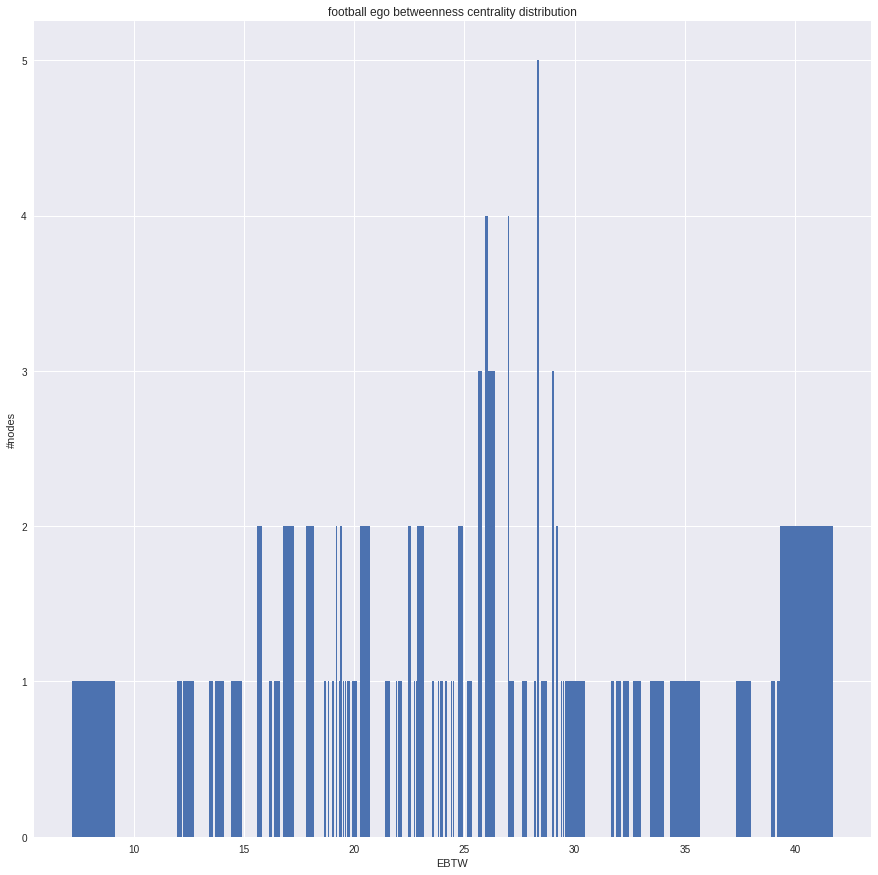

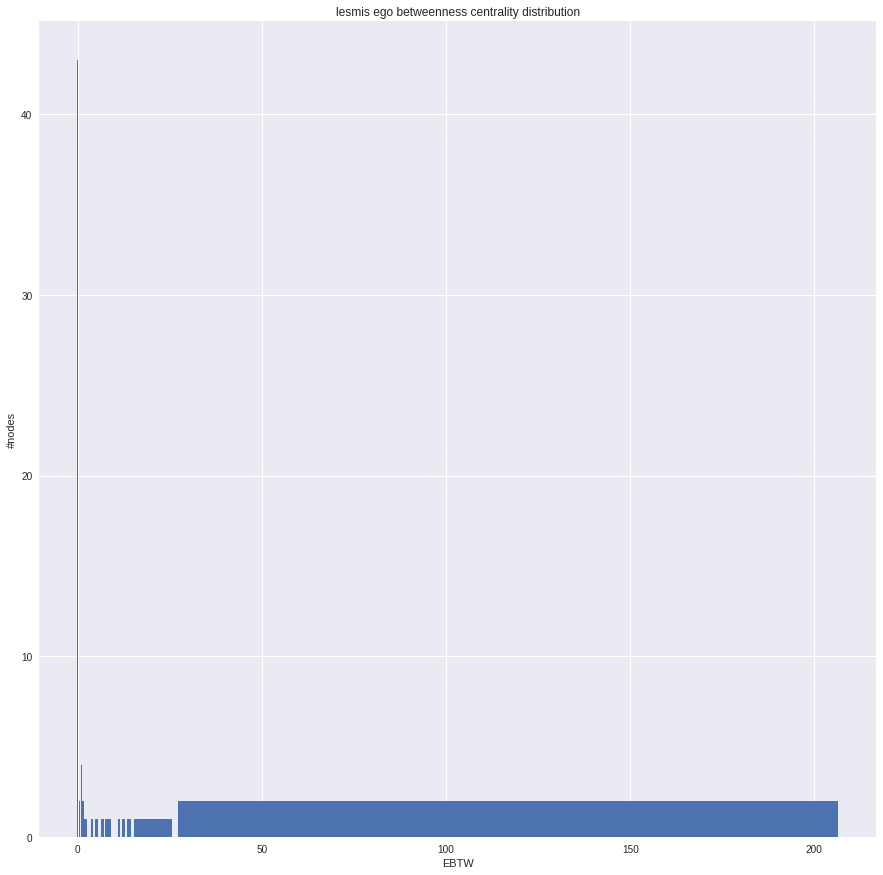

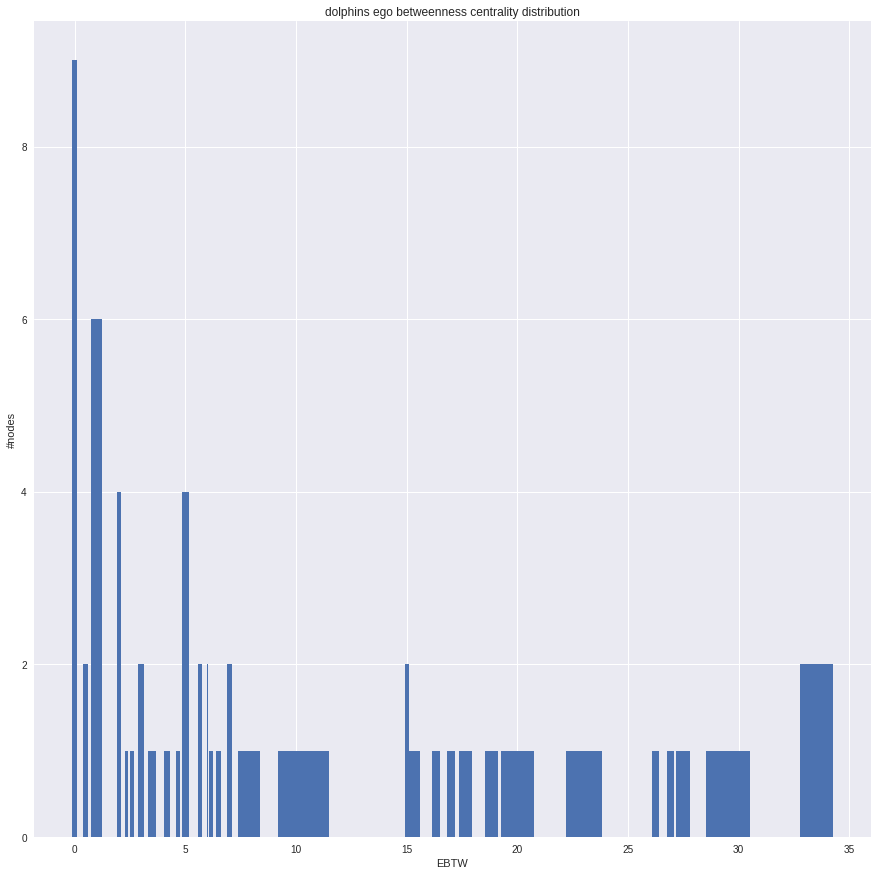

In [0]:
for key in ebtw.keys():
  plt.figure()
  plt.title(key+" ego betweenness centrality distribution")
  plt.xlabel("EBTW")
  plt.ylabel("#nodes")
  degree_hist(ebtw[key])

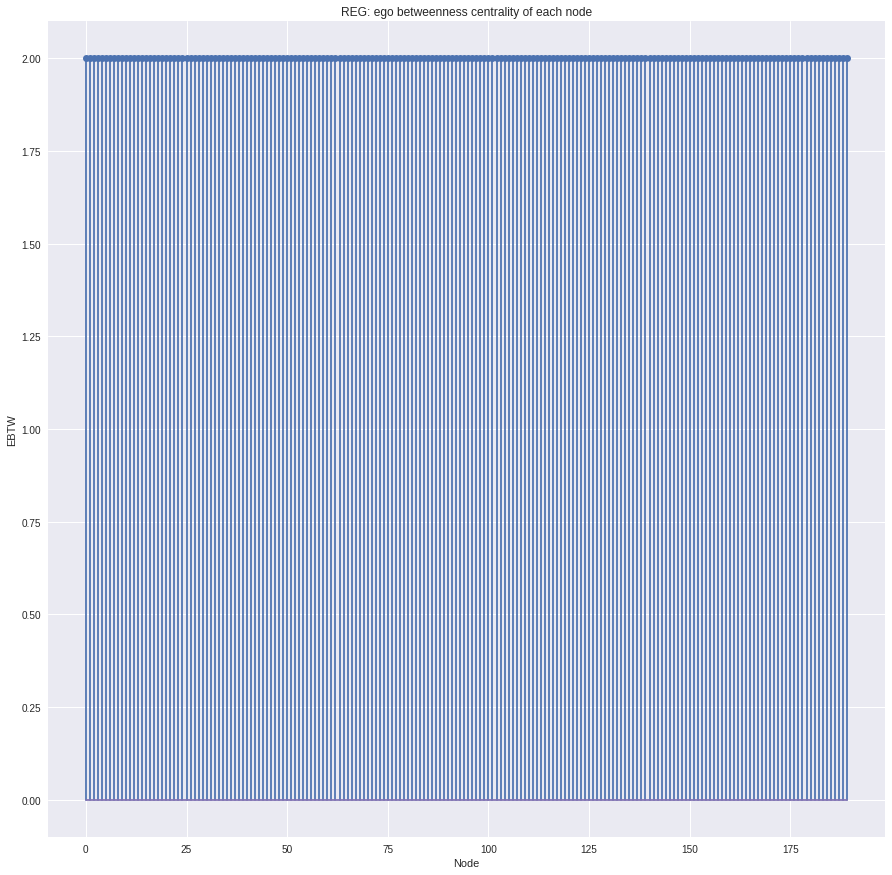

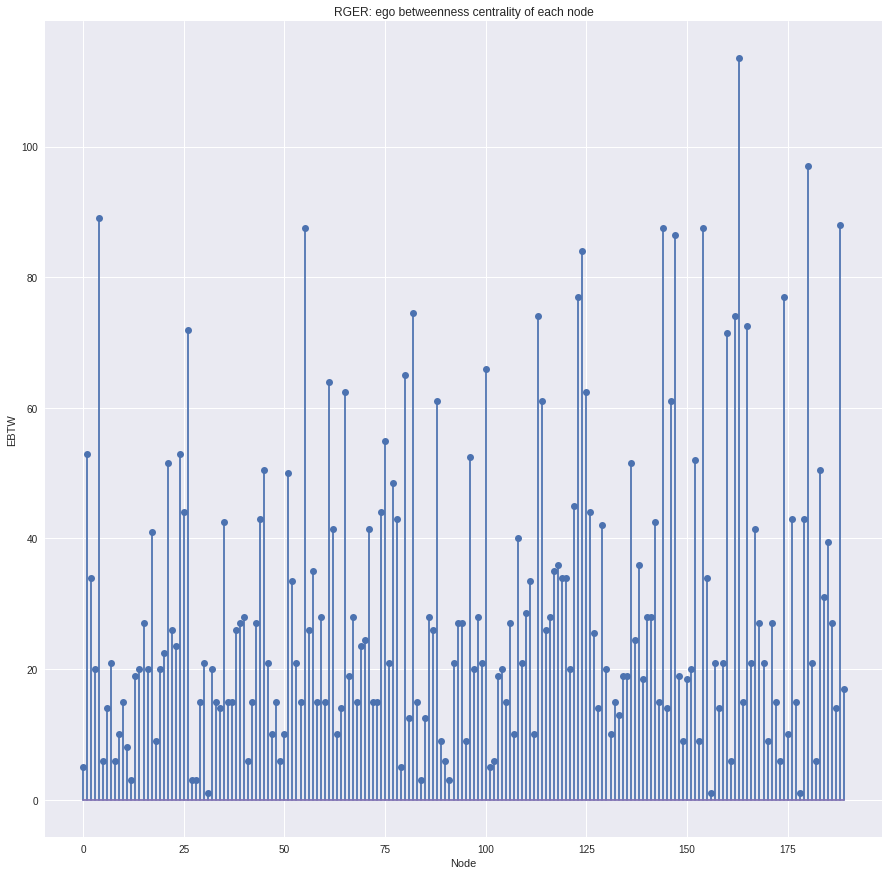

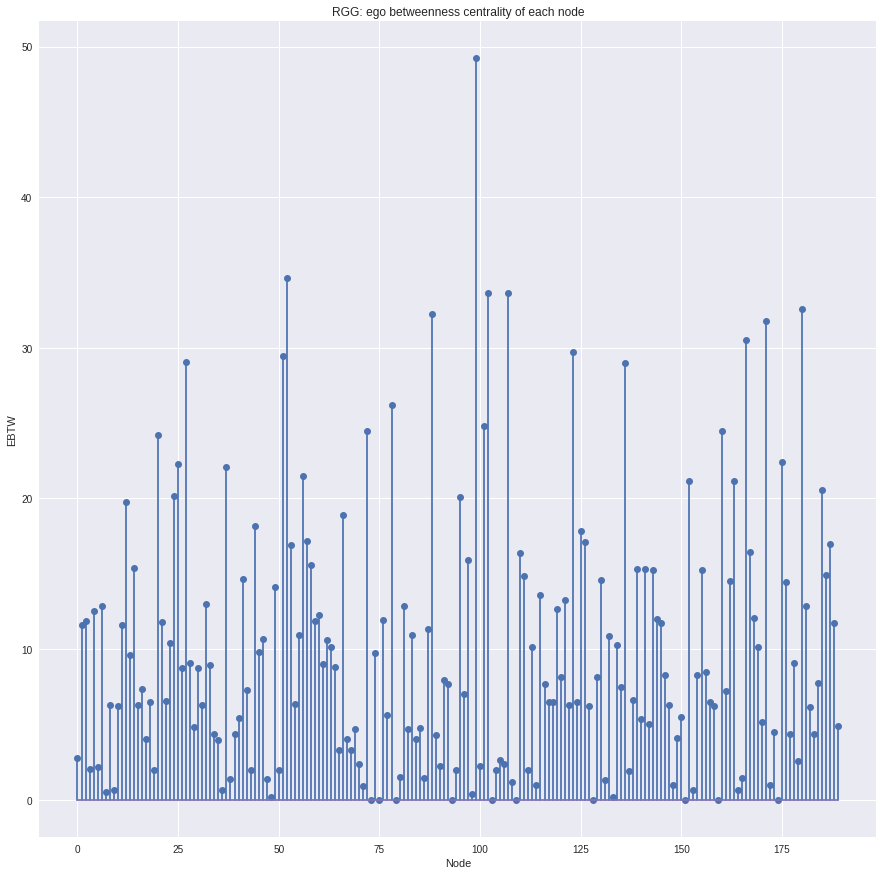

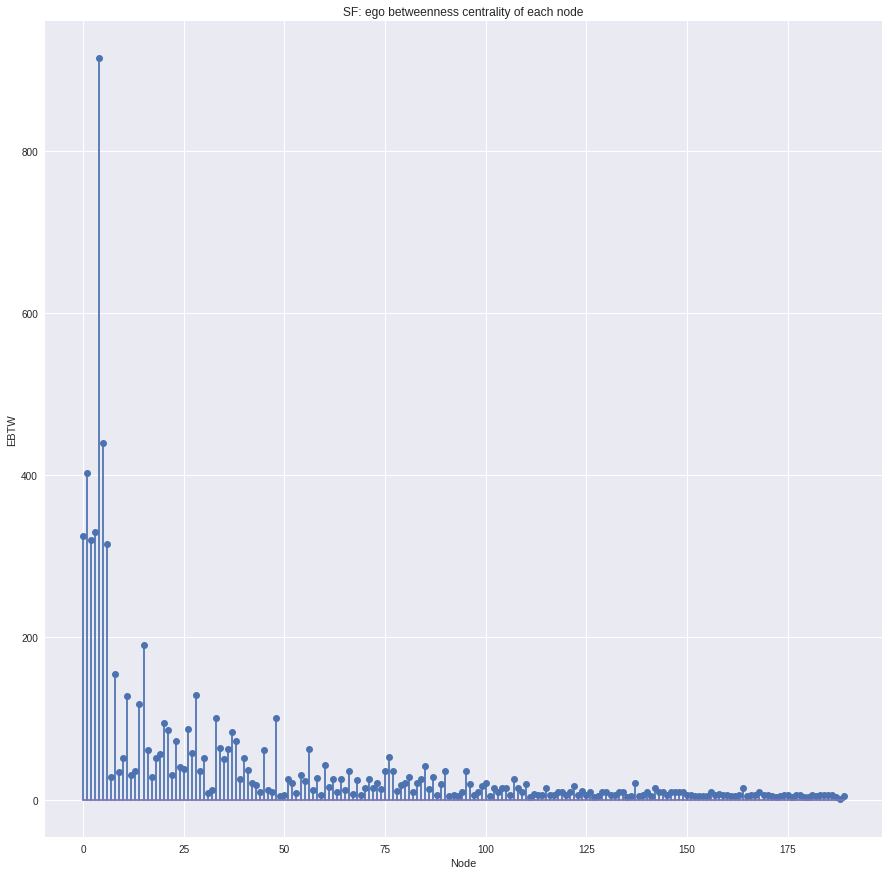

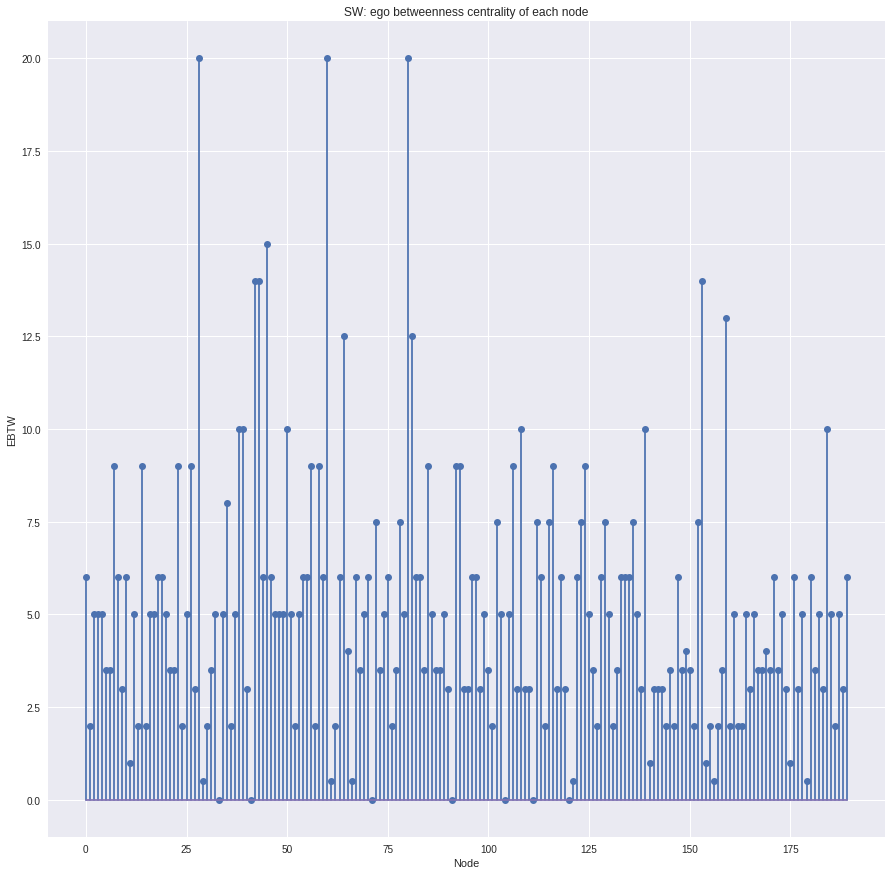

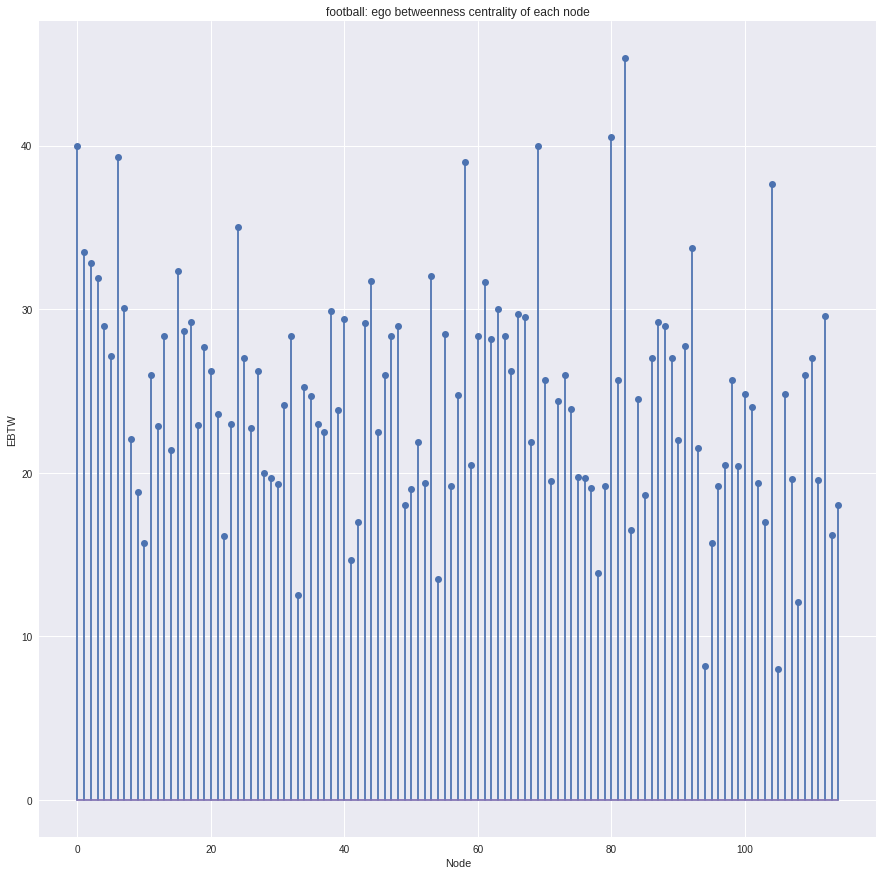

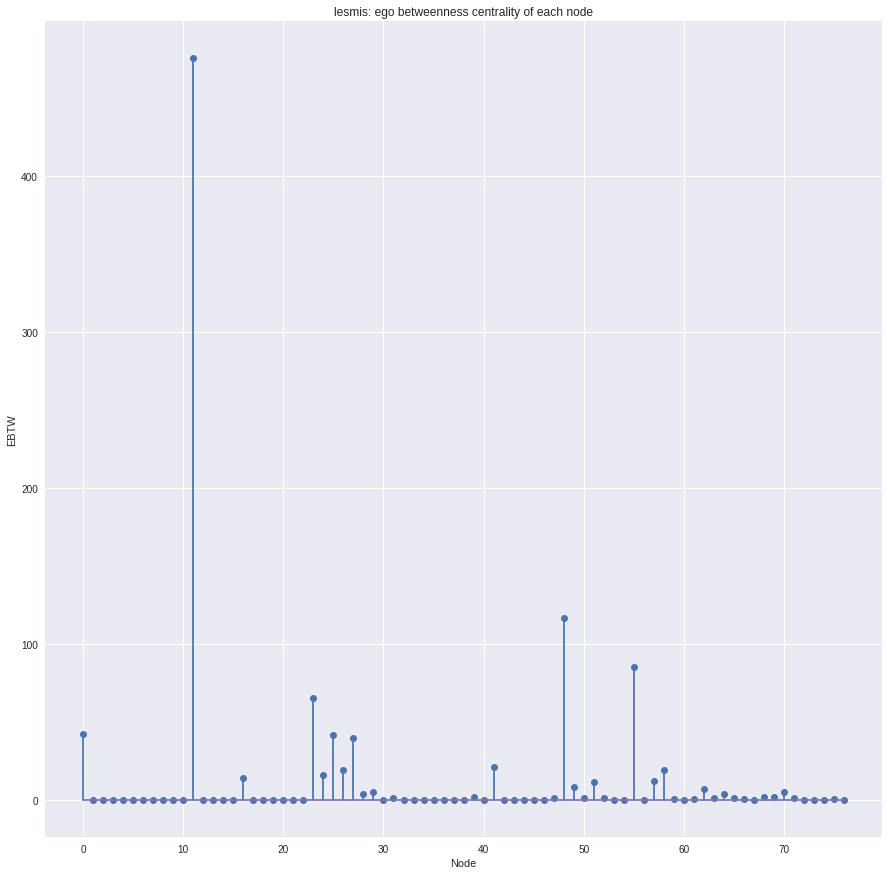

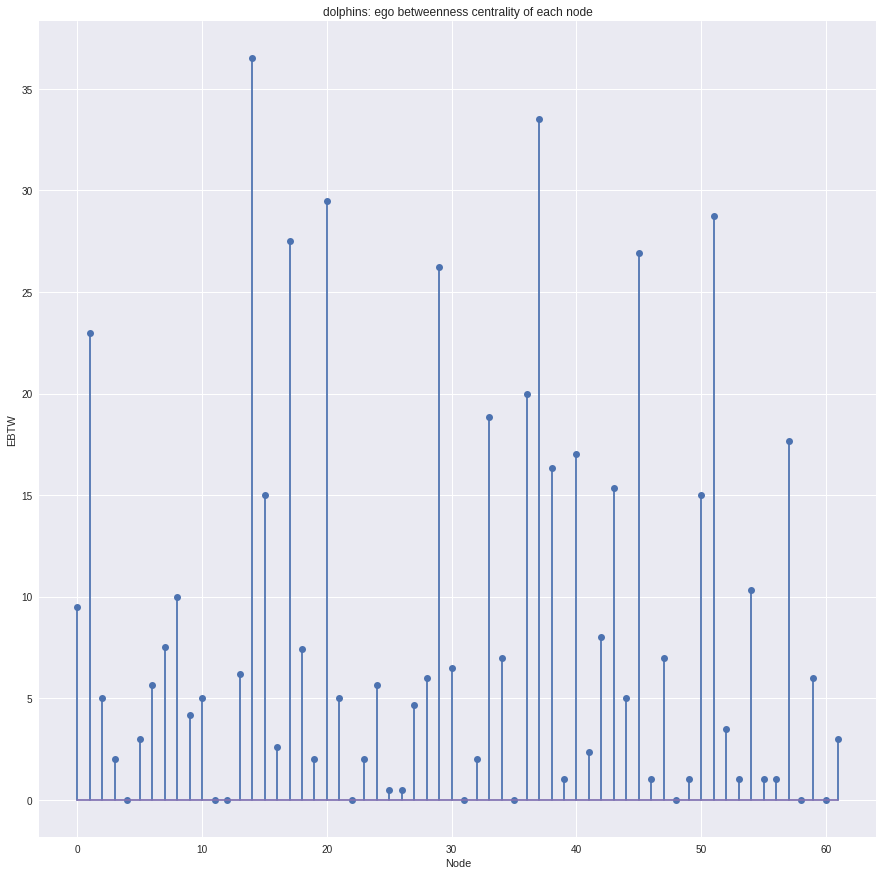

In [0]:
for key in ebtw.keys():
  plt.figure()
  plt.title(key+": ego betweenness centrality of each node")
  plt.xlabel("Node")
  plt.ylabel("EBTW")
  plt.stem(ebtw[key].keys(), ebtw[key].values())

In [0]:
for key in mean_ebtw.keys():
  print(UNDERLINE + key+ ' network:' + END)
  mean = mean_ebtw[key]
  print("The average ego betweenness centrality is: %f" %mean)

REG network:
The average ego betweenness centrality is: 2.000000
RGER network:
The average ego betweenness centrality is: 29.771930
RGG network:
The average ego betweenness centrality is: 10.093510
SF network:
The average ego betweenness centrality is: 38.305877
SW network:
The average ego betweenness centrality is: 5.063158
football network:
The average ego betweenness centrality is: 24.722133
lesmis network:
The average ego betweenness centrality is: 13.318460
dolphins network:
The average ego betweenness centrality is: 8.517473


## Comments on the results

1. Based on the above plots, we can see that the Football network is similar to a Small World network. The node degrees of the Football graph have low variance, which is a feature of the SW graphs. In addition, although the average values of both the clustering coefficient and the ego-betweenness centrality are higher than the values we calculated for the SW, we could modify the values of the parameters with which we constructed the SW model and get closer results. (example below)
2. In the case of the Les Miserables graph, the plots above don't really give us an intuition about the type of the network. The node degrees seem to be similar to the degrees of the SF topology. On the other hand, the other two metrics (clustering coefficient and ego-betweenness centrality) are closer to the values we calculated for the RGG. However we can see on the visualization of the graph that there are "popular" nodes (leading characters in the play) with many edges. Therefore, the SF model seems like the best option to simulate the Les Miserables network. The small number of nodes is probably the reason behind the deviation in our metrics.
3. In the case of the Dolphins network, we can easily notice, both from the produced plots and the average values we calculated for the metrics, that it is quite similar to the SW topology. (example below)



**SW similar to football topology**

In [0]:
SW_football = nx.watts_strogatz_graph(110,10,0.2)

In [0]:
print("Average degree: %f" %np.mean(list(find_degree(SW_football).values()) ))
print("Clustering Coefficient: %f" %np.mean(list(clust_coef(SW_football).values())))
print("Ego betweenness centrality: %f"%np.mean(list(ego_centrality(SW_football).values())))

Average degree: 10.000000
Clustering Coefficient: 0.371499
Ego betweenness centrality: 21.850152


**SF similar to Les Miserables topology**

In [0]:
SF_lesmis = nx.barabasi_albert_graph(75, 3)

In [0]:
print("Average degree: %f" %np.mean(list(find_degree(SF_lesmis).values()) ))
print("Clustering Coefficient: %f" %np.mean(list(clust_coef(SF_lesmis).values())))
print("Ego betweenness centrality: %f"%np.mean(list(ego_centrality(SF_lesmis).values())))

Average degree: 5.760000
Clustering Coefficient: 0.178723
Ego betweenness centrality: 18.182222


**SW similar to Dolphins topology**

In [0]:
SW_dolphins = nx.watts_strogatz_graph(65,6,0.3)

In [0]:
print("Average degree: %f" %np.mean(list(find_degree(SW_dolphins).values()) ))
print("Clustering Coefficient: %f" %np.mean(list(clust_coef(SW_dolphins).values())))
print("Ego betweenness centrality: %f"%np.mean(list(ego_centrality(SW_dolphins).values())))

Average degree: 6.000000
Clustering Coefficient: 0.244762
Ego betweenness centrality: 11.082051


# Part B: Community detection algorithms

Using the functions in **table2** and for every real (**table1**) and artificial (**Lab1**) network:
1. Visualize the communities found with each method
2. Comment on the results 

In the visualization, each community must be identified by a unique color.

For each community detection algorithm calculate the modularity of the communities found using the following function:

`networkx.algorithms.community.quality.modularity`


<b>Table 2</b>: Community detection algorithms
<table style=float:left;width:70%>
    <tr>
        <th style=text-align:left> Community detection algorithm</th>
        <th style=text-align:left>Function</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

## Defining colors for the communities

In [0]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

## Detecting communities


### Girvan-Newman method

In [0]:
from itertools import takewhile
#girvan_newman:partitions of at most k=50 communities, select the one with the highest value of modularity.
#use nx.algorithms.community.centrality.girvan_newman for the communities
#nx.algorithms.community.quality.modularity to measure modularity

def comd_GN(G,k):
  best = 0
  best_coms = None
  comp = nx.algorithms.community.centrality.girvan_newman(G)   
  limited = takewhile(lambda c: len(c) <= k, comp)
  for communities in limited:
    com  = tuple(sorted(c) for c in communities) 
    mod = nx.algorithms.community.quality.modularity(G,com)
    if mod>best:
      best = mod
      best_coms = com
  return best_coms


In [0]:
GN_coms = {
    'REG':comd_GN(REG,50),
    'RGER':comd_GN(RGER,50),
    'RGG':comd_GN(RGG,50),
    'SF':comd_GN(SF,50),
    'SW':comd_GN(SW,50),
    'football':comd_GN(nfootball,50),
    'lesmis':comd_GN(nlesmis,50),
    'dolphins':comd_GN(ndolphins,50)
}

### Spectral Clustering method

In [0]:
#Spectral Clustering:all partitions of k={1,..50} communities
#use SpectralClustering for the communities
#nx.algorithms.community.quality.modularity to measure modularity

def comd_SP(G,k):
  A = nx.adjacency_matrix(G).todense()
  best = 0
  best_coms = None
  for i in range(1,k+1):
    clustering = SpectralClustering(n_clusters=i).fit(A)
    com = []
    for u in np.unique(clustering.labels_):
      subl = [x for x in range(len(clustering.labels_)) if clustering.labels_[x]==u]
      com.append(subl)
    mod = nx.algorithms.community.quality.modularity(G,com)
    if (mod > best):
      best = mod
      best_coms = com
  return best_coms

In [0]:
SP_coms = {
    'REG':comd_SP(REG,50),
    'RGER':comd_SP(RGER,50),
    'RGG':comd_SP(RGG,50),
    'SF':comd_SP(SF,50),
    'SW':comd_SP(SW,50),
    'football':comd_SP(nfootball,50),
    'lesmis':comd_SP(nlesmis,50),
    'dolphins':comd_SP(ndolphins,50)
}

### Modularity Maximization method

In [0]:
#Modularity Maximization
#use nx.algorithms.community.modularity_max.greedy_modularity_communities for the communities
#nx.algorithms.community.quality.modularity to measure modularity

def comd_MM(G):
  return [list(x) for x in nx.algorithms.community.modularity_max.greedy_modularity_communities(G)] 

In [0]:
MM_coms = {
    'REG':comd_MM(REG),
    'RGER':comd_MM(RGER),
    'RGG':comd_MM(RGG),
    'SF':comd_MM(SF),
    'SW':comd_MM(SW),
    'football':comd_MM(nfootball),
    'lesmis':comd_MM(nlesmis),
    'dolphins':comd_MM(ndolphins)
}

## Visualizing communities

In [0]:
pos = {
  'REG':nx.fruchterman_reingold_layout(REG),
  'RGER':nx.fruchterman_reingold_layout(RGER),
  'RGG':nx.fruchterman_reingold_layout(RGG),
  'SF':nx.fruchterman_reingold_layout(SF),
  'SW':nx.fruchterman_reingold_layout(SW),
  'football':nx.fruchterman_reingold_layout(nfootball),
  'lesmis':nx.fruchterman_reingold_layout(nlesmis),
  'dolphins':nx.fruchterman_reingold_layout(ndolphins)
}

In [0]:
def visual_com(G,nodelist, pos):
  nx.draw_networkx_edges(G, pos=pos)
  for (nodes,i) in zip(nodelist,range(len(nodelist))):
    nx.draw_networkx_nodes(G, pos=pos ,nodelist=nodes ,node_color=colors[i])

In [0]:
def subplots(G,G_name):
  gs = gridspec.GridSpec(2, 2)
  fig = plt.figure(figsize=(20,15))
  ax1 = fig.add_subplot(gs[0, 0])
  visual_com(G,GN_coms[G_name], pos[G_name])
  ax2 = fig.add_subplot(gs[0, 1])
  visual_com(G,SP_coms[G_name], pos[G_name])
  ax3 = fig.add_subplot(gs[1, 0])
  visual_com(G,MM_coms[G_name], pos[G_name])
  ax1.set_title('Newman-Girvan')
  ax2.set_title('Spectral clustering')
  ax3.set_title('Modularity Maximization')
  plt.show()


In [0]:
def print_mods(G, G_name):
  print("Girvan-Newman: %f" %nx.algorithms.community.quality.modularity(G,GN_coms[G_name]))
  print("Spectral Clustering: %f" %nx.algorithms.community.quality.modularity(G,SP_coms[G_name]))
  print("Modularity Maximization: %f" %nx.algorithms.community.quality.modularity(G,MM_coms[G_name]))

### Les Miserables

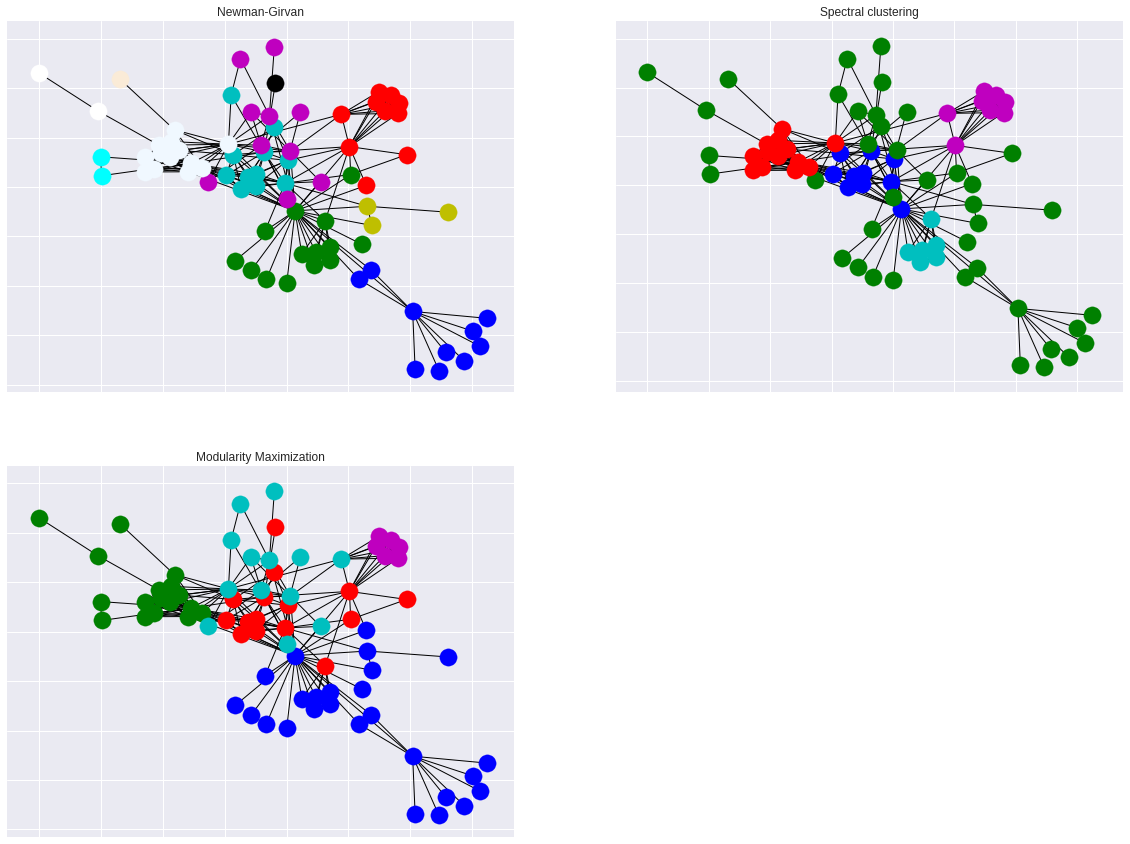

In [0]:
subplots(nlesmis,'lesmis')

In [0]:
print(UNDERLINE+"Modularities for Les Miserables Graph"+END)
print_mods(nlesmis,'lesmis')

Modularities for Les Miserables Graph
Girvan-Newman: 0.538068
Spectral Clustering: 0.463707
Modularity Maximization: 0.500597


**Comments**

In the Les Miserables graph we can see that the Spectral Clustering method gives the worst results, whilst it calculates the least number of communities (same as the Modularity Maximization method). On the other hand, the Girvan-Newman method gives the best results in regard to the modularity metric although it calculates five more communities than the other two methods. Its also interesting to notice that some of those extra five communities include only one node.

### American College Football

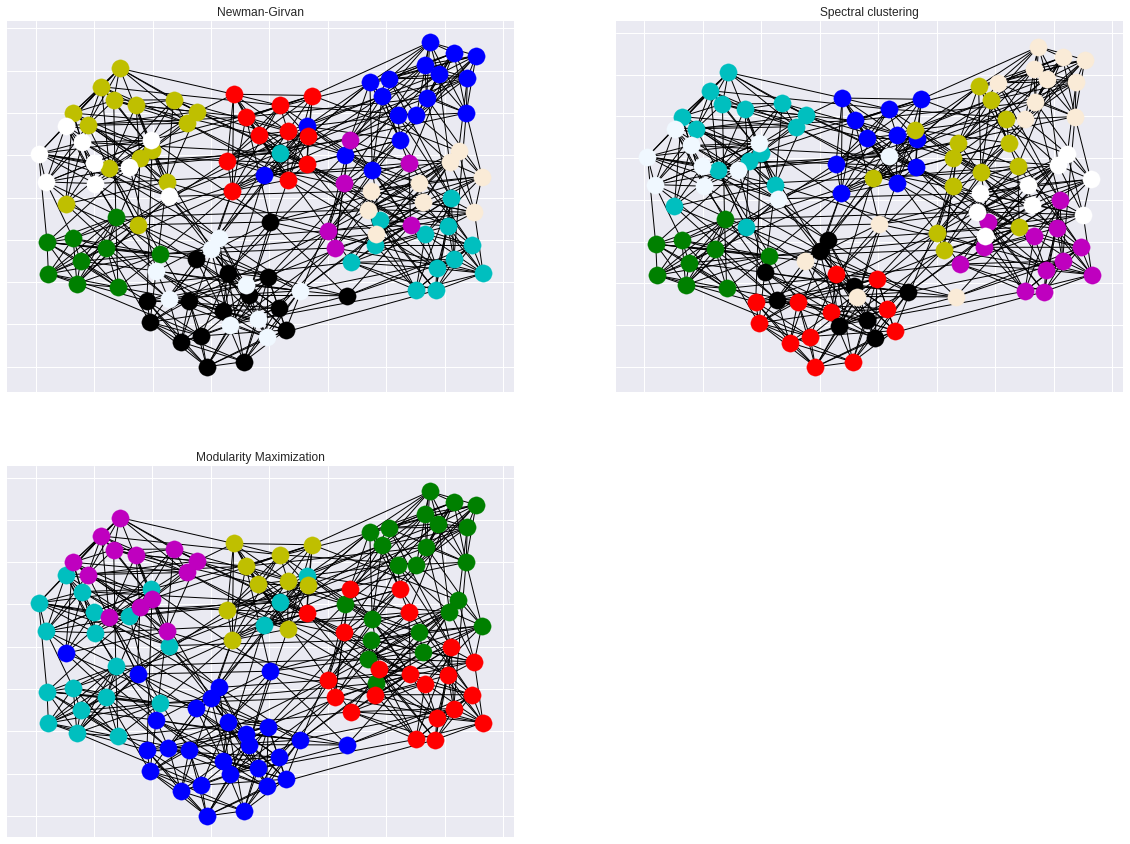

In [0]:
subplots(nfootball,'football')

In [0]:
print(UNDERLINE+"Modularities for American College Football Graph"+END)
print_mods(nfootball,'football')

Modularities for American College Football Graph
Girvan-Newman: 0.599629
Spectral Clustering: 0.597251
Modularity Maximization: 0.549741


**Comments**

In the American College Football graph we can see that all of the community detection methods have quite similar performances in regard to their modularity. The Girvan-Newman method seems to have a slight edge and the Modularity Maximization method seems to be the worst of the three. Its also important to notice that while the Girvan-Newman and Spectral Clustering methods calculate almost the same modularity, they also form the same number of communities which also seem to include the same nodes (based on the visualization above). Οn the contrary, The Modularity Maximization method forms six communities (four communities less than the other two methods) whilst achieving a close modularity performance.

### Dolphins


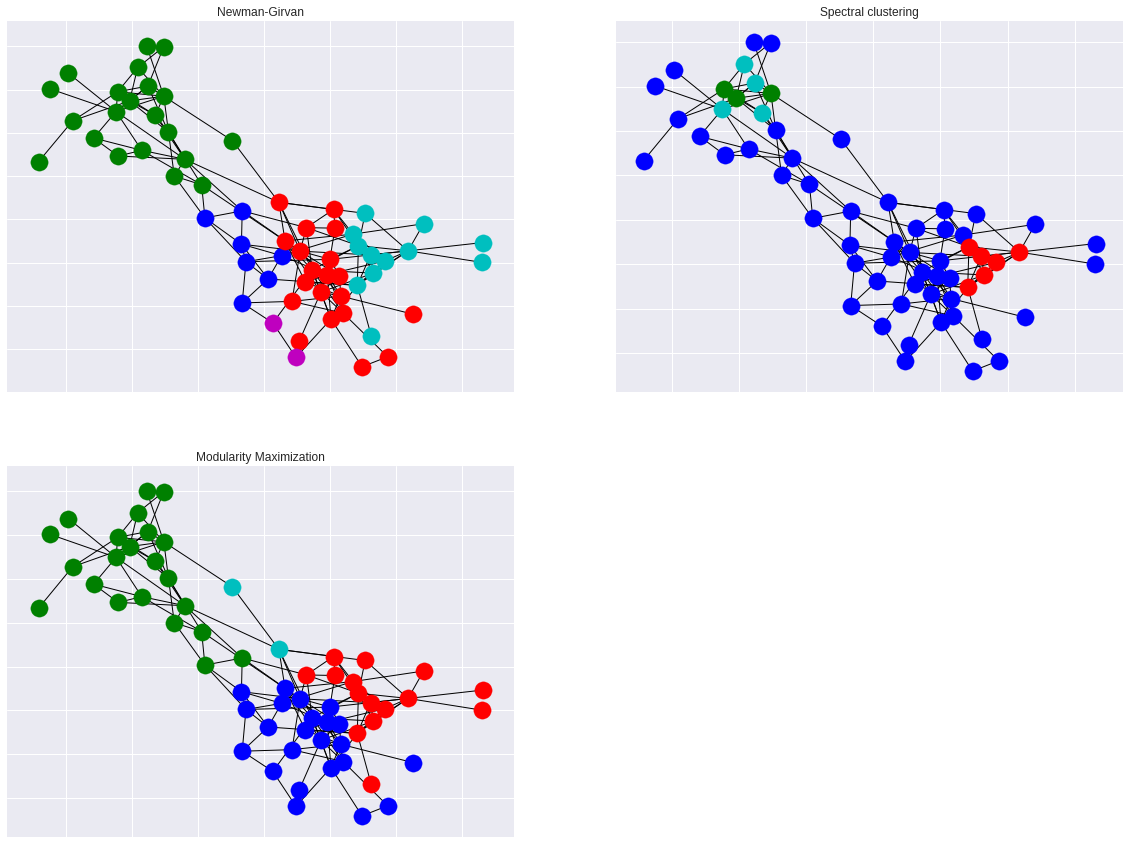

In [0]:
subplots(ndolphins,'dolphins')

In [0]:
print(UNDERLINE+"Modularities for Dolphins Graph"+END)
print_mods(ndolphins,'dolphins')

Modularities for Dolphins Graph
Girvan-Newman: 0.519382
Spectral Clustering: 0.173708
Modularity Maximization: 0.495491


**Comments**

In the case of the Dolhpins graph, we notice that the best modularity performance is given by the Girvan-Newman method, whilst the Modularity Maximization method has quite similar performance with one less community formed. The Spcetral Clustering method, in contrast, gives the worst results of the three with a really low modularity performance although it forms the same number of communities with the Modularity Maximization method.

### REG

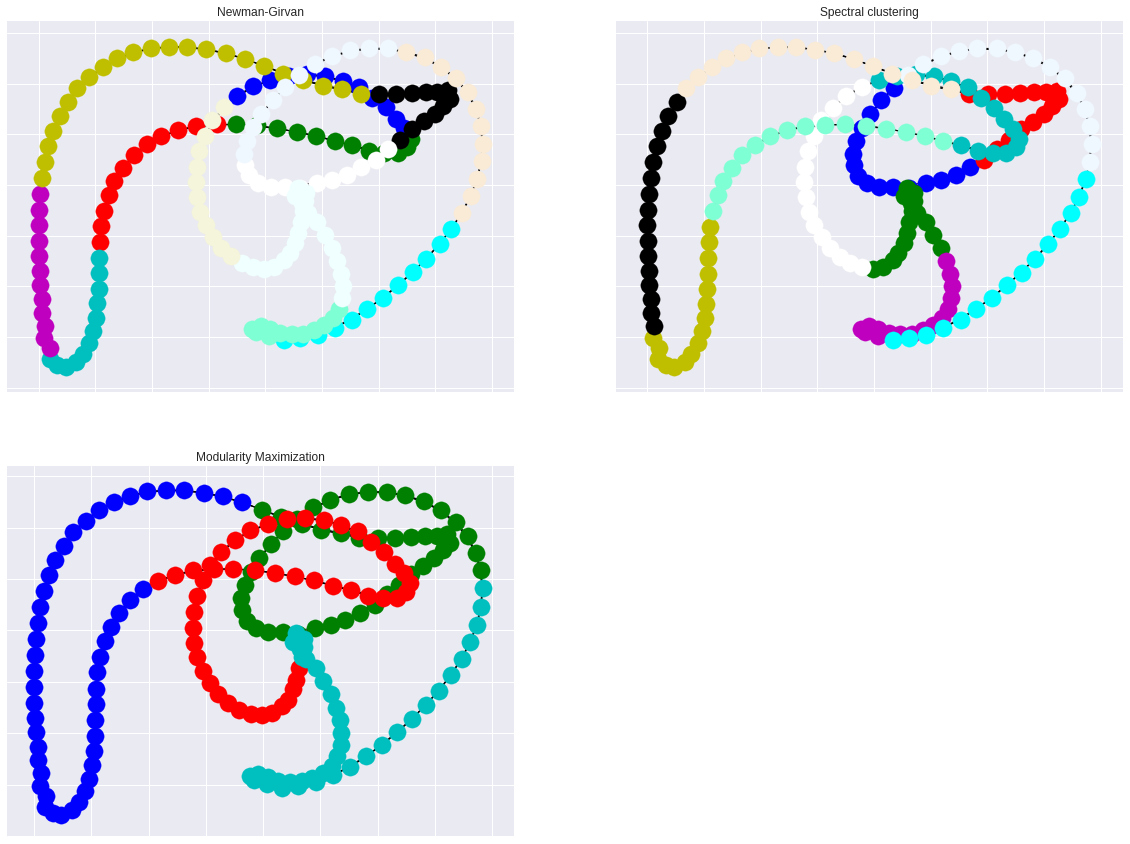

In [0]:
subplots(REG,'REG')

In [0]:
print(UNDERLINE+"Modularities for REG"+END)
print_mods(REG,'REG')

Modularities for REG
Girvan-Newman: 0.812299
Spectral Clustering: 0.821828
Modularity Maximization: 0.717673


**Comments**

In the case of the Regular Graph, all of the methods perform well in regard to the modularity metric. The Girvan-Newman and the Specral Clustering methods achieve the best results. Girvan-Newman also forms the most communities, followed by the Spectral Clustering. The Modularity Maximization has the worst performance of the three algorithms but it also forms the least communities. 

### RGER

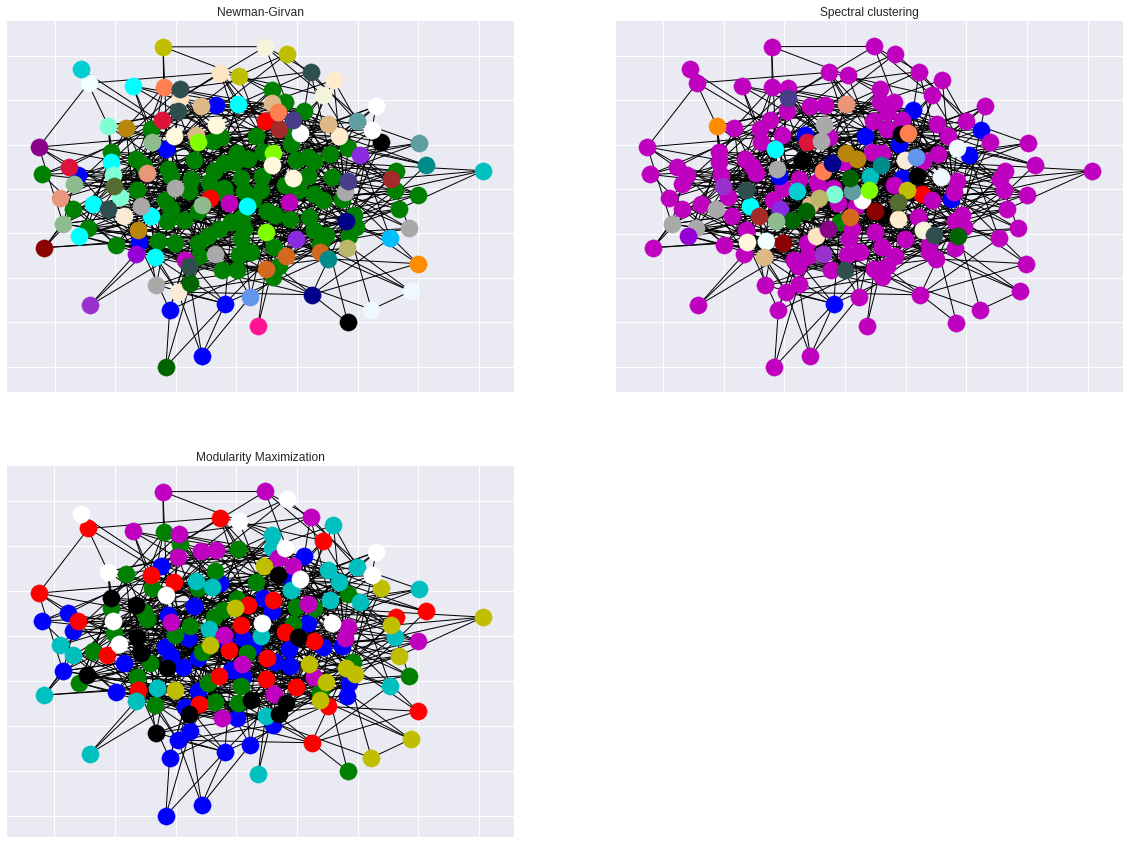

In [0]:
subplots(RGER,'RGER')

In [0]:
print(UNDERLINE+"Modularities for RGER"+END)
print_mods(RGER,'RGER')

Modularities for RGER
Girvan-Newman: 0.176056
Spectral Clustering: 0.010839
Modularity Maximization: 0.301915


**Comments**

In this case, the Modularity Maximization method performs best in the community detection task. However, even with this algorithm the modularity performance we calculate is very low which means that none of the algorithms seperate well the nodes into communities.


### RGG

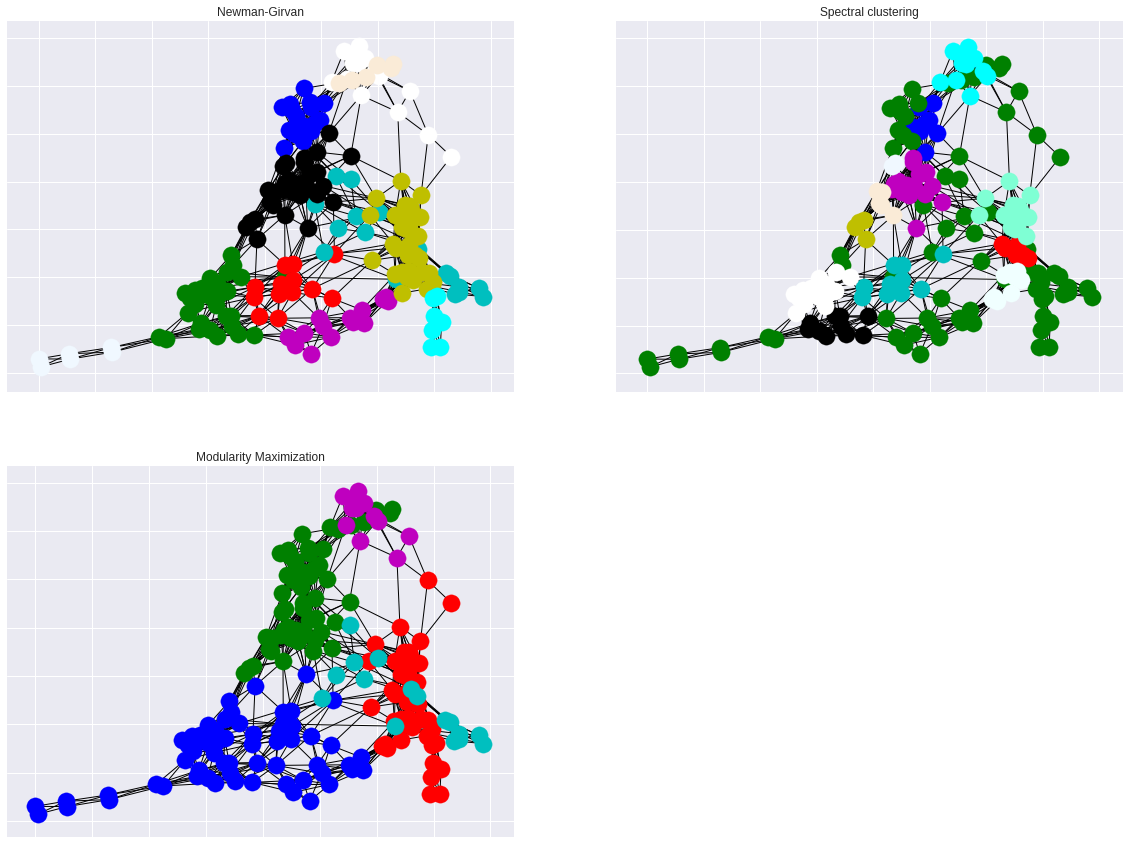

In [0]:
subplots(RGG,'RGG')

In [0]:
print(UNDERLINE+"Modularities for RGG"+END)
print_mods(RGG,'RGG')

Modularities for RGG
Girvan-Newman: 0.687830
Spectral Clustering: 0.522160
Modularity Maximization: 0.650178


**Comments**

As we can see, the Girvan-Newman and Modularity Maximization methods give similar results, followed by the Spectral Clustering method which is close. However, the modularity performances achieved by the three methods are not as expected. The RGG graph is known to be easily seperated into communities because of the way its constructed, since the nodes of the graph are topologically seperated on the plane. Therefore, we expected better modularity performances.


### SW

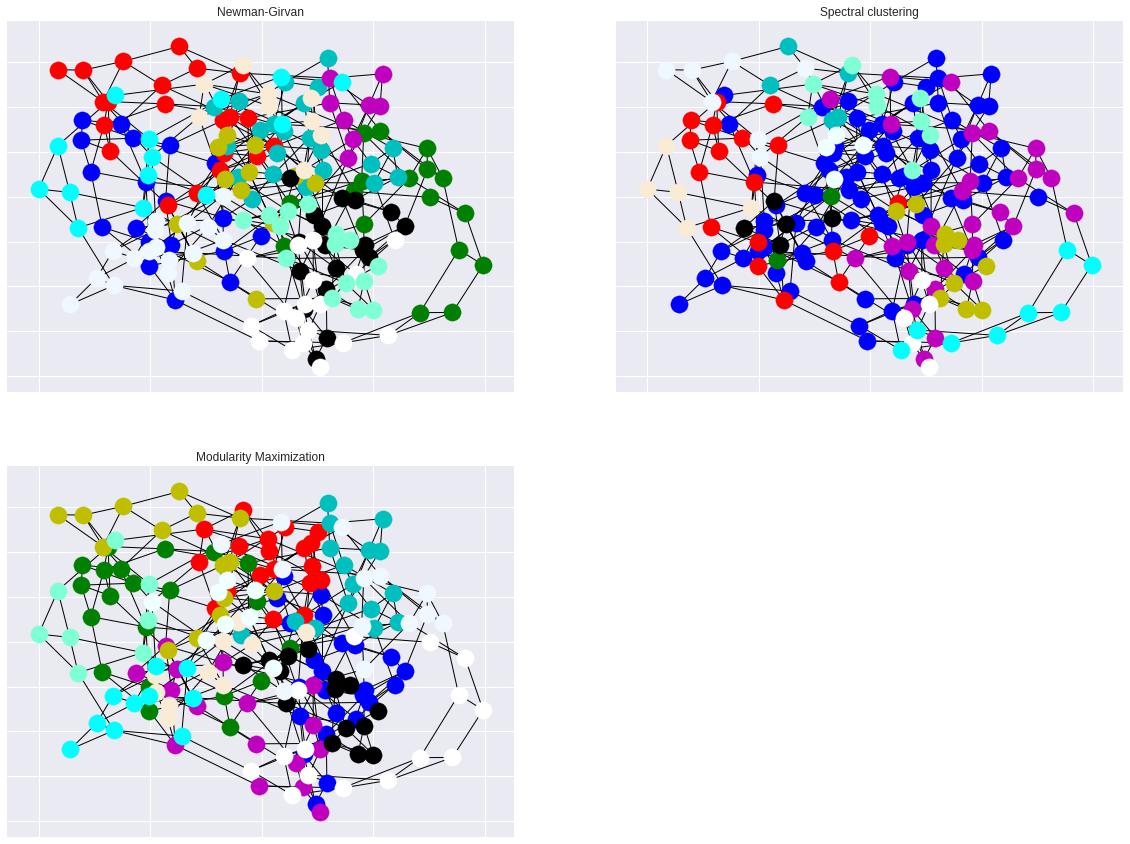

In [0]:
subplots(SW,'SW')

In [0]:
print(UNDERLINE+"Modularities for SW"+END)
print_mods(SW,'SW')

Modularities for SW
Girvan-Newman: 0.662711
Spectral Clustering: 0.497213
Modularity Maximization: 0.662493


**Comments**

In the case of the SW graph we can see that the Girvan-Newman and Modularity Maximization methods give similar results in regard to their modularities. The Spectral Clustering method gives worse results but its still close to the other two.


### SF

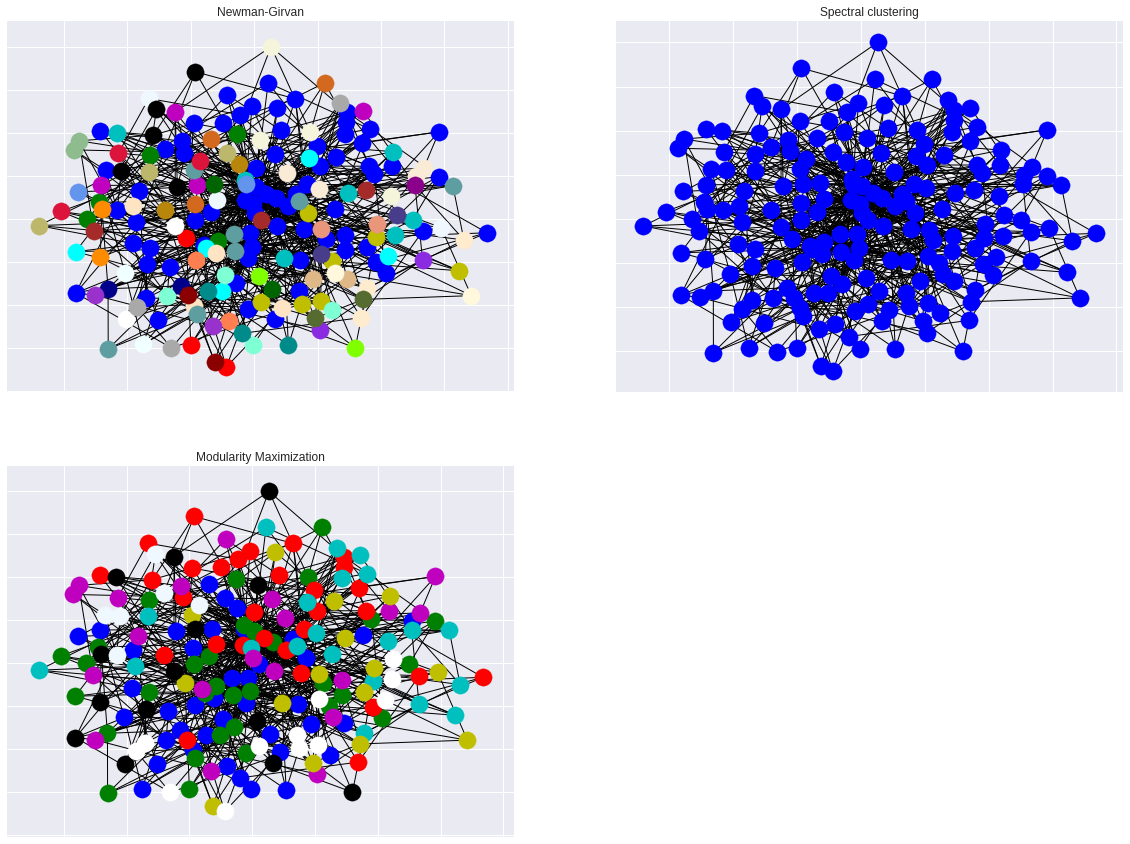

In [0]:
subplots(SF,'SF')

In [0]:
print(UNDERLINE+"Modularities for SF"+END)
print_mods(SF,'SF')

Modularities for SF
Girvan-Newman: 0.201163
Spectral Clustering: 0.000000
Modularity Maximization: 0.297001


**Comments**

In the case of the SF graph we can see that the method that achieves the best modularity value is the Modularity Maximization. However even the best value is quite low. Therefore, none of the methods succeeds into separating well the graph into communities. In addition, its significant to notice that in the case of the Spectral Clustering method there is no separation at all. All of the nodes in the graph are assigned to the same community due to the fact that in Scale Free graphs, the "popular" nodes are usually connected with each other and therefore form a community when we use this method.

## General observations

First of all, we observe that while the performance of the Spectral Clustering method in the artificial topologies (with an exception for the REG) was the worst of the three, in the real topologies (Football and Les Miserables) its performance was similar to the other two methods. 

In addition, its important to notice that the Girvan-Newman method achieved the best results in all of the three real topologies. However, in the cases of the artificial topologies RGER and SF its performance was quite low. 

Finally, a noteworthy fact is that the Modularity Maximization method's performance was constantly good. It wasn't always the best, but it performed well for all of the different kinds of topologies, real and artificial. The reason behind that is probably the use of the modularity as an evaluation metric for the performance of the algorithms.  